# roi.py

In [9]:
import SimpleITK as sitk
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# dir = 'C:/Users/Tao/Desktop/data/0' #data.nii
# label_dir = 'C:/Users/Tao/Desktop/data/labels/0' #mask.nii
# roi_dir = 'C:/Users/Tao/Desktop/data/roi/0/' #roi.nii
dir = r'D:/Project/CTSeg/data/1' #data.nii
label_dir = r'D:/Project/CTSeg/data/labels/1' #label.nii
roi_dir = r'D:/Project/CTSeg/data/roi/1/'
fileloder = os.listdir(dir)

In [10]:
for file in fileloder:
    (name, _) = os.path.splitext(file)
    image=sitk.ReadImage(dir + '/' + file)#你的image的地址
    mask_dir = os.path.join(label_dir,name)
    save_dir = roi_dir + name
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for mask in os.listdir(mask_dir):
        if mask.endswith('.nii'):
            (mask_name, _) = os.path.splitext(mask)
            roi_=sitk.ReadImage(os.path.join(mask_dir,mask))#你的mask的地址
            array_roi_=sitk.GetArrayFromImage(roi_)
            if np.all(array_roi_ == 0):
                print(file)
                break
            pixelType = sitk.sitkInt8
            size = image.GetSize()
            origin = image.GetOrigin()
            spacing = image.GetSpacing()
            direction = image.GetDirection()
            roi= sitk.Image(size, pixelType)
            roi = sitk.GetImageFromArray(array_roi_)
            roi.SetSpacing(spacing)
            roi.SetDirection(direction)
            roi.SetOrigin(origin)
            sitk.WriteImage(roi, save_dir + '/{}.nii'.format(mask_name[:3]))#roi的输出路径

s1850189-0003-00002-000001.nii
s1886306-0002-00002-000001.nii
s8KDMy81LqylMcoEUircvRg-0002-00002-000001.nii
sPB6VmT8wnRErvLaAuFO6A-0002-00002-000001.nii
sVoRz8GkfhzXegqf5Z6ETkA-0002-00002-000001.nii


In [11]:
import os 
import numpy as np
import SimpleITK as sitk

roi_dir = r'D:/Project/CTSeg/data/roi/1/' #roi.nii
fileloder = os.listdir(roi_dir)

for item in fileloder:
    item_path = os.path.join(roi_dir, item)
    if os.listdir(item_path):
        array_roi_ = []
        for file in os.listdir(item_path):
            file_path = os.path.join(item_path, file)
            image = sitk.ReadImage(file_path)
            array_roi_.append(sitk.GetArrayFromImage(image))
            
        array = array_roi_[0] + array_roi_[1] + array_roi_[2]
#         file_path = os.path.join(item_path, 'c01.nii')
#         image = sitk.ReadImage(file_path)
#         array = np.ones_like(sitk.GetArrayFromImage(image))
        pixelType = sitk.sitkInt8
        size = image.GetSize()
        origin = image.GetOrigin()
        spacing = image.GetSpacing()
        direction = image.GetDirection()
        roi= sitk.Image(size, pixelType)
        roi = sitk.GetImageFromArray(array)
        roi.SetSpacing(spacing)
        roi.SetDirection(direction)
        roi.SetOrigin(origin)
        sitk.WriteImage(roi, item_path + '/c00.nii')
    else:
        print(item)

s1850189-0003-00002-000001
s1886306-0002-00002-000001
s8KDMy81LqylMcoEUircvRg-0002-00002-000001
sPB6VmT8wnRErvLaAuFO6A-0002-00002-000001
sVoRz8GkfhzXegqf5Z6ETkA-0002-00002-000001


# radiomics.py


In [141]:
import radiomics
from radiomics import featureextractor
import pandas as pd
import os
import warnings
 
warnings.filterwarnings("ignore")

dataDir = "C:/Users/Tao/Desktop/data/"
para_path = './Params.yaml'
dir = 'C:/Users/Tao/Desktop/data/0' #data.nii
label_dir = 'C:/Users/Tao/Desktop/data/labels/0' #mask.nii
roi_dir = 'C:/Users/Tao/Desktop/data/roi/0/' #roi.nii
fileloder = os.listdir(dir)
CTSeg = pd.read_excel("C:/Users/Tao/Desktop/CTSeg.xlsx", sheet_name="sheet1")
CTSeg_0 = CTSeg[CTSeg['CTtime'] == 0]

In [145]:
# dataDir = "C:/Users/Tao/Desktop/data/"
# for folder1 in ['CPC1 49=17+17+15','CPC2 11=4+4+3','CPC3 13=5+5+3','CPC4 56=24+18+14','CPC5 161=84+44+33']:
#     dir2 = os.path.join(dataDir, folder1)
#     for folder2 in os.listdir(dir2):
#         dir3 = os.path.join(dir2, folder2)
#         for filename in os.listdir(dir3):
#             print(filename)

import pandas as pd

# 假设您的文本文件名为 'data.txt'，并且每行包含一个姓名和时间范围
file_path = 'sample.txt'

# 读取文本文件
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 创建空的DataFrame
df = pd.DataFrame(columns=['姓名', '时间范围'])

# 填充数据到DataFrame
for line in lines:
    line = line.strip()  # 去除每行首尾的空白字符
    if line:  # 确保不处理空行
        name, time_range = line.rsplit(' ', 1)  # 假设每个条目格式为 "姓名 时间范围"
        df = df.append({'姓名': name, '时间范围': time_range}, ignore_index=True)

# 去除重复的姓名行，保留所有不同的时间范围
df = df.groupby('姓名').agg({'时间范围': lambda x: ', '.join(x.unique())}).reset_index()

# 保存到CSV文件
# df.to_csv('time_range_table.csv', index=False)
writer = pd.ExcelWriter("./time_range_table.xlsx")
df.to_excel(writer, sheet_name="sheet0",index=False)
writer.save()
writer.close()

# 打印结果查看
# print(df)

In [13]:
for folder in fileloder:
    imageName = os.path.join(dir, folder)
    (name, _) = os.path.splitext(folder)
    roifilename = os.path.join(roi_dir,name)
    if os.listdir(roifilename):
        for file in os.listdir(roifilename):
            (roiname, _) = os.path.splitext(file)
            maskName = os.path.join(roifilename, file)
            try:
                if CTSeg_0.loc[CTSeg_0['CTid'] == name, 'CPC'].values[0] == 5:
                    break
                else:
                    print(folder+"    "+str(CTSeg_0.loc[CTSeg_0['CTid'] == name, 'CPC'].values[0]))
                    break
            except:
                print(folder+"  "+file)
                continue

s1412778-0002-00002-000001.nii    4
s1417145-0002-00002-000001.nii    4
s1968921-0002-00002-000001.nii    2
s1993233-0002-00002-000001.nii    4
s1994036-0002-00002-000001.nii    1
s1d8i6mQrcUR5MRJbJutApw-0002-00002-000001.nii    1
s2133355-0003-00006-000001.nii    1
s2198373-0002-00002-000001.nii    2
s2236564-0002-00002-000001.nii    4
s2243063-0002-00002-000001.nii    4
s2369602-0002-00002-000001.nii    4
s2391329-0002-00002-000001.nii    4
s2gZfVE4qHomQmS6Jg27yAQ-0002-00002-000001.nii    1
s3612115-0602-00001-000001.nii    4
s3AxhYZedwiRQsTAw9Xw-0002-00002-000001.nii    4
s3IDezaPfOmgG1y1MuVq6VQ-0002-00002-000001.nii    4
s4a8Vdq5k1t5NdQ9YnugRQ-0002-00002-000001.nii    1
s4TdtAm5QX1hMkqMiNSjLQ-0002-00002-000001.nii    4
s666978-0002-00002-000001.nii    3
s6HjSxY9HPAIwJRg0xWfogg-0002-00002-000001.nii    1
s6UJcWWmsFHpzy430I8qtnQ-0002-00002-000001.nii    2
s7W8lMdoj8lg7Illpu1kWGg-0002-00002-000001.nii    4
s8KDMy81LqylMcoEUircvRg-0002-00002-000001.nii    3
s931618-0002-00002-000001.ni

In [3]:
extractor = featureextractor.RadiomicsFeatureExtractor(para_path)
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
dict_df_1 = {"c00":df0, "c01":df1, "c02":df2, "c03":df3}
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()
df7 = pd.DataFrame()
dict_df_2 = {"c00":df7, "c01":df4, "c02":df5, "c03":df6}
for folder in fileloder:
    imageName = os.path.join(dir, folder)
    (name, _) = os.path.splitext(folder)
    roifilename = os.path.join(roi_dir,name)
    if os.listdir(roifilename):
        for file in os.listdir(roifilename):
            (roiname, _) = os.path.splitext(file)
            maskName = os.path.join(roifilename, file)
            try:
                featureVector = extractor.execute(imageName,maskName)
                df_add = pd.DataFrame.from_dict(featureVector.values()).T
                df_add.columns = featureVector.keys()
                if CTSeg_0.loc[CTSeg_0['CTid'] == name, 'CPC'].values[0] == 5:
                    dict_df_2[roiname] = pd.concat([dict_df_2[roiname],df_add])
                else:
                    dict_df_1[roiname] = pd.concat([dict_df_1[roiname],df_add])    
            except:
                print(folder+"  "+file)
                continue


Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "t

sMDosEtUFlx6eSeM1ZDp7w-0002-00002-000001.nii  c02.nii


Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D


sMPscplkIoyfuyJXAptvaHQ-0002-00002-000001.nii  c02.nii


Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" o

In [36]:
# imageName = r"C:\Users\Tao\Desktop\data\0\sMPscplkIoyfuyJXAptvaHQ-0002-00002-000001.nii"
# maskName = r"C:\Users\Tao\Desktop\data\roi\0\sMPscplkIoyfuyJXAptvaHQ-0002-00002-000001\c00.nii"
# extractor = featureextractor.RadiomicsFeatureExtractor(para_path)
# featureVector = extractor.execute(imageName,maskName)
# df_add = pd.DataFrame.from_dict(featureVector.values()).T
# df_add.columns = featureVector.keys()

Calculating Local Binary Pattern in 2D, but extracting features in 3D. Use with caution!
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D


In [37]:
# data = pd.read_excel("./0_1del.xlsx",sheet_name="sheet2")
# data = pd.concat([data,df_add])
# with pd.ExcelWriter("./0_1del.xlsx", mode='a', engine='openpyxl',index=False) as writer:
#    data.to_excel(writer, sheet_name="sheet2_new")

In [4]:
# 将DataFrame写入Excel文件
# df.to_excel('CTSeg.xlsx', index=False)
writer = pd.ExcelWriter("./0_1del.xlsx")
dict_df_1['c00'].to_excel(writer, sheet_name="sheet0",index=False)
dict_df_1['c01'].to_excel(writer, sheet_name="sheet1",index=False)
dict_df_1['c02'].to_excel(writer, sheet_name="sheet2",index=False)
dict_df_1['c03'].to_excel(writer, sheet_name="sheet3",index=False)
writer.save()
writer.close()

writer = pd.ExcelWriter("./0_2del.xlsx")
dict_df_2['c00'].to_excel(writer, sheet_name="sheet0",index=False)
dict_df_2['c01'].to_excel(writer, sheet_name="sheet1",index=False)
dict_df_2['c02'].to_excel(writer, sheet_name="sheet2",index=False)
dict_df_2['c03'].to_excel(writer, sheet_name="sheet3",index=False)
writer.save()
writer.close()

# lasso_new.py

In [120]:
import pandas as pd
import numpy as np
from matplotlib import cm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LogisticRegression

result_all = {'数据一':{'LOG':[],'SVM':[]},'数据二':{'LOG':[],'SVM':[]},'数据三':{'LOG':[],'SVM':[]}}

Lasso picked 18 variables and eliminated the other 4895
                                             features   coefficient
0               wavelet-HLH_glszm_SmallAreaEmphasis_0 -4.784826e-02
1   wavelet-HHH_glszm_GrayLevelNonUniformityNormal... -4.323760e-03
2               wavelet-LLL_firstorder_10Percentile_0 -4.871034e-02
3                     lbp-3D-m2_firstorder_Kurtosis_0 -4.543123e-02
4           original_glszm_LowGrayLevelZoneEmphasis_1  3.519457e-02
5       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_1 -5.424113e-02
6                    wavelet-LLH_glszm_ZoneVariance_1 -3.127196e-02
7                        wavelet-LLH_ngtdm_Strength_1 -2.078524e-03
8                              wavelet-LLL_glcm_Idn_1 -3.634757e-03
9   wavelet-LLL_gldm_LargeDependenceLowGrayLevelEm...  2.126399e-02
10                        square_firstorder_Minimum_1 -5.304518e-02
11  log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGra... -6.251304e-02
12         wavelet-LLH_gldm_DependenceNonUniformity_3  1.246

TP:4 FN:6 FP:4 TN:12
ACC： 0.6153846153846154
Recall： 0.4
Specificity： 0.75
Precision： 0.5
NPV： 0.6666666666666666
AUC： 0.6875
Lasso picked 19 variables and eliminated the other 4894
                                             features   coefficient
0                log-sigma-1-0-mm-3D_ngtdm_Busyness_0  2.809361e-03
1                             wavelet-LLH_glcm_Idmn_0  2.459527e-02
2   wavelet-LHH_glszm_SizeZoneNonUniformityNormali... -7.137702e-02
3           original_glszm_LowGrayLevelZoneEmphasis_1  5.961068e-02
4       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_1 -6.726551e-02
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_1  5.574495e-02
6               wavelet-LHL_glszm_SmallAreaEmphasis_1 -1.139075e-03
7                        wavelet-LHH_ngtdm_Contrast_1  1.337358e-02
8                              wavelet-LLL_glcm_Idn_1 -2.912831e-03
9                  wavelet-LLL_glcm_InverseVariance_1  3.393283e-02
10                   wavelet-LLL_glszm_ZoneVariance_1 -5.419997e-03
11

TP:3 FN:7 FP:2 TN:14
ACC： 0.6538461538461539
Recall： 0.3
Specificity： 0.875
Precision： 0.6
NPV： 0.6666666666666666
AUC： 0.61875
Lasso picked 34 variables and eliminated the other 4879
                                             features   coefficient
0   wavelet-LHH_glszm_SizeZoneNonUniformityNormali... -8.229914e-03
1               wavelet-HLH_glszm_SmallAreaEmphasis_0 -2.961608e-02
2                     lbp-3D-m2_firstorder_Kurtosis_0 -2.800892e-02
3           original_glszm_LowGrayLevelZoneEmphasis_1  2.811393e-02
4                log-sigma-1-0-mm-3D_ngtdm_Busyness_1 -3.142377e-03
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_1  2.064833e-02
6   log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGra... -7.479533e-03
7               wavelet-LLH_glszm_LargeAreaEmphasis_1 -3.595513e-02
8               wavelet-LHL_glszm_SmallAreaEmphasis_1 -4.234038e-02
9                        wavelet-LHH_ngtdm_Contrast_1  1.076435e-02
10                       wavelet-HLL_ngtdm_Busyness_1 -5.681830e-03


TP:6 FN:4 FP:5 TN:11
ACC： 0.6538461538461539
Recall： 0.6
Specificity： 0.6875
Precision： 0.5454545454545454
NPV： 0.7333333333333333
AUC： 0.6125
Lasso picked 23 variables and eliminated the other 4890
                                             features  coefficient
0                  original_firstorder_10Percentile_0    -0.009741
1                log-sigma-1-0-mm-3D_ngtdm_Contrast_0     0.012799
2   wavelet-LHH_glszm_SizeZoneNonUniformityNormali...    -0.068957
3   wavelet-HLH_glszm_SizeZoneNonUniformityNormali...    -0.027473
4                     lbp-3D-m2_firstorder_Kurtosis_0    -0.008485
5           original_glszm_LowGrayLevelZoneEmphasis_1     0.026148
6       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_1    -0.053585
7                log-sigma-1-0-mm-3D_ngtdm_Busyness_1    -0.009272
8          log-sigma-3-0-mm-3D_glcm_InverseVariance_1     0.025595
9                    wavelet-LLH_glszm_ZoneVariance_1    -0.045665
10                       wavelet-LLH_ngtdm_Strength_1    -0.0185

TP:4 FN:6 FP:2 TN:14
ACC： 0.6923076923076923
Recall： 0.4
Specificity： 0.875
Precision： 0.6666666666666666
NPV： 0.7
AUC： 0.63125
Lasso picked 24 variables and eliminated the other 4889
                                             features  coefficient
0                     log-sigma-1-0-mm-3D_glcm_Idmn_0    -0.017001
1                        wavelet-LLH_ngtdm_Busyness_0    -0.027038
2   wavelet-LHH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.010586
3   wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphas...    -0.007845
4               wavelet-HLH_glszm_SmallAreaEmphasis_0    -0.044844
5               exponential_firstorder_10Percentile_0    -0.013259
6                     lbp-3D-m2_firstorder_Kurtosis_0    -0.018329
7           original_glszm_LowGrayLevelZoneEmphasis_1     0.028261
8       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_1    -0.036865
9                log-sigma-1-0-mm-3D_ngtdm_Busyness_1    -0.009163
10         log-sigma-3-0-mm-3D_glcm_InverseVariance_1     0.014701
11          

TP:5 FN:4 FP:5 TN:11
ACC： 0.64
Recall： 0.5555555555555556
Specificity： 0.6875
Precision： 0.5
NPV： 0.7333333333333333
AUC： 0.6597222222222222
acc： 0.6741538461538461
recall： 0.5311111111111112
precision： 0.5906060606060606
F1： 0.5592808044424433
specificity： 0.7625
npv： 0.7272222222222222
auc： 0.6419444444444444
acc平均值为：0.630359标准差为:0.039555
sensitivity平均值为：0.460741标准差为:0.063803
specificity平均值为：0.733333标准差为:0.026021
ppv平均值为：0.515657标准差为:0.065074
npv平均值为：0.693122标准差为:0.031340
auc平均值为：0.622130标准差为:0.021312


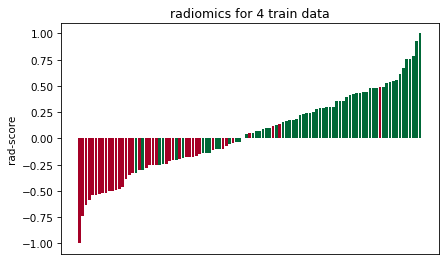

<Figure size 640x480 with 0 Axes>

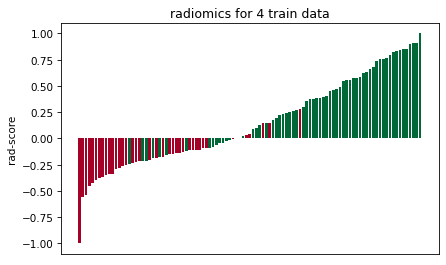

<Figure size 640x480 with 0 Axes>

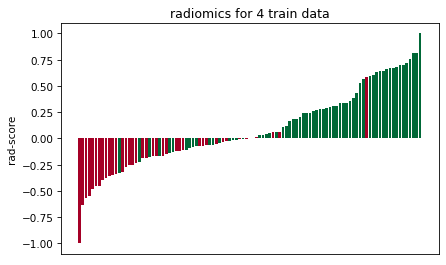

<Figure size 640x480 with 0 Axes>

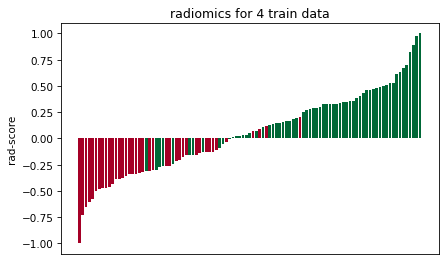

<Figure size 640x480 with 0 Axes>

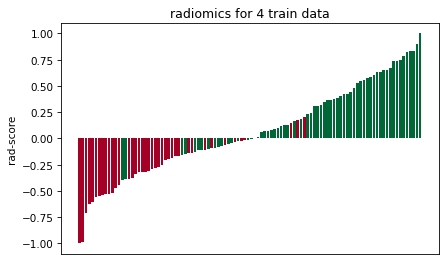

<Figure size 640x480 with 0 Axes>

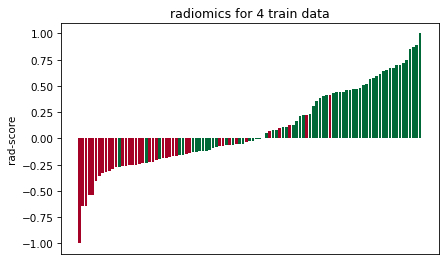

<Figure size 640x480 with 0 Axes>

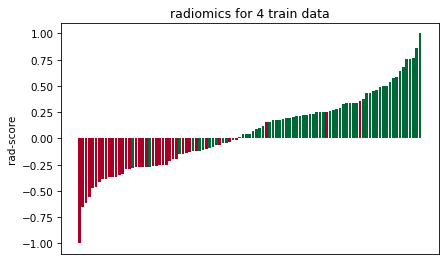

<Figure size 640x480 with 0 Axes>

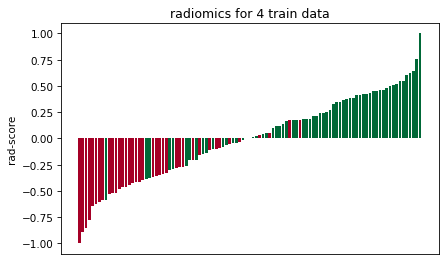

<Figure size 640x480 with 0 Axes>

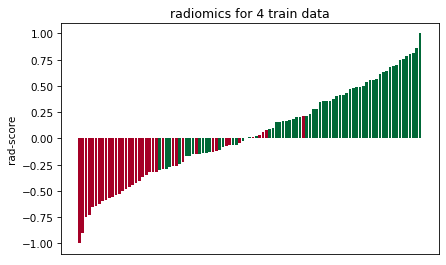

<Figure size 640x480 with 0 Axes>

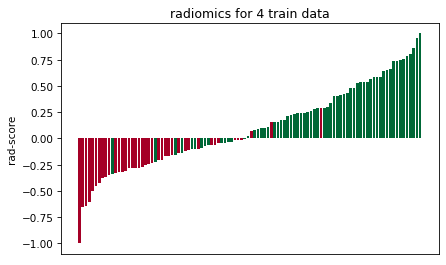

<Figure size 640x480 with 0 Axes>

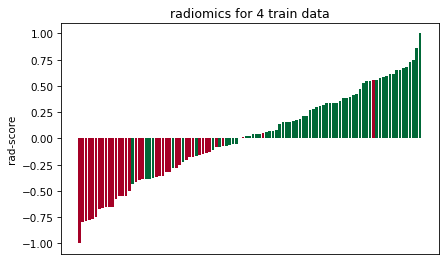

<Figure size 640x480 with 0 Axes>

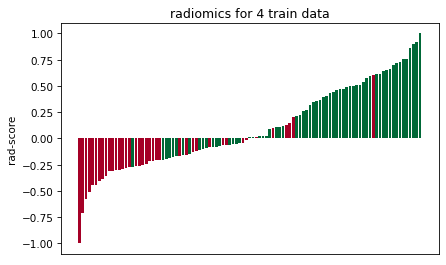

<Figure size 640x480 with 0 Axes>

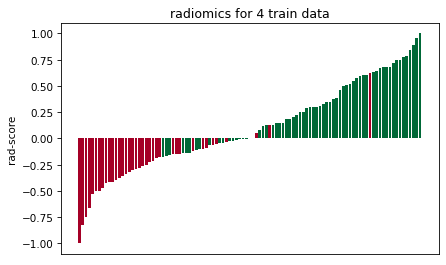

<Figure size 640x480 with 0 Axes>

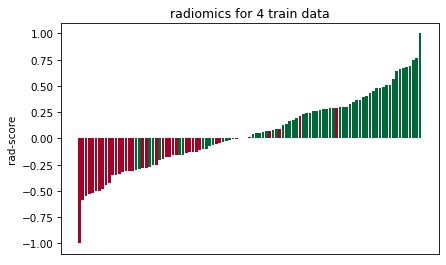

<Figure size 640x480 with 0 Axes>

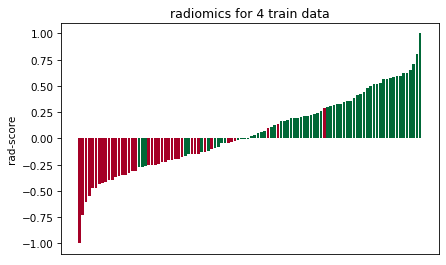

<Figure size 640x480 with 0 Axes>

In [139]:
list_acc = []
list_sensitivity = []
list_specificity = []
list_ppv = []
list_npv = []
list_auc = []
output = 'lab4/output_4/SVM'
data_use = '数据三'
svm_use = 1

if data_use == '数据三':  
        plt_title = 'radiomics for 4 train data'
        sheetlist = ['sheet0','sheet1','sheet2','sheet3']
elif data_use == '数据二':
    plt_title = 'radiomics for 3 train data'   
    sheetlist = ['sheet1','sheet2','sheet3']
elif data_use == '数据一':
    plt_title = 'radiomics for 1 train data' 
    sheetlist = ['sheet0']



def pre_data(data,suffix):
    
    data = data.fillna(0)
    data = data.loc[:, data.nunique() != 1] #如果某列所有值相同，则去除
    data = data.drop_duplicates(subset=None, keep='first') #对行进行去重
    data = data.drop(['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash'], axis=1)
    data = data.drop(['diagnostics_Image-original_Spacing','diagnostics_Image-original_Size',\
                     'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size',\
                      'diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex',\
                      'diagnostics_Mask-original_CenterOfMass'],axis=1)
    data = data.add_suffix(suffix)
    
    return data
for i in range(3):
    # 1. 数据整理及准备
    # 分别读取存活和死亡excel
#     xlsx1_filePath = '1_2cpc_time0.xlsx' # 存活病例
#     xlsx2_filePath = '3_4cpc_time0.xlsx' # 死亡病例
    
    xlsx1_filePath = 'GM_WM_CSF_mask_01.xlsx' # 存活病例
    xlsx2_filePath = 'GM_WM_CSF_mask_02.xlsx' # 死亡病例
    
    dataall = []
    for sheet in sheetlist:
        data_1 = pd.read_excel(xlsx1_filePath,sheet_name=sheet)
        data_2 = pd.read_excel(xlsx2_filePath,sheet_name=sheet)
        data_1 = pre_data(data_1,'_'+sheet[-1])
        data_2 = pre_data(data_2,'_'+sheet[-1])
        dataall.append(data_1)
        dataall.append(data_2)

    if data_use == '数据三':
        data_1 = pd.concat([dataall[0],dataall[2],dataall[4],dataall[6]],1)
        data_2 = pd.concat([dataall[1],dataall[3],dataall[5],dataall[7]],1)
    elif data_use == '数据二':
        data_1 = pd.concat([dataall[0],dataall[2],dataall[4]],1)
        data_2 = pd.concat([dataall[1],dataall[3],dataall[5]],1)

    rows_1,__ = data_1.shape
    rows_2,__ = data_2.shape
    # 将两个excel分别赋予生存/死亡标签（1/2）
    data_1.insert(0,'label',[1]*rows_1)
    data_2.insert(0,'label',[2]*rows_2)
    # 将1，2混合并且打乱，构建一个全部的Datafream
    data = pd.concat([data_1,data_2])
    
    data = shuffle(data)
    data = data.dropna(axis=1,how='any')
    
#     X = data[data.columns[1:]]
#     y = data['label']
#     colNames = X.columns
#     X = X.astype(np.float64)
#     X = StandardScaler().fit_transform(X) # new knowledge
#     X = pd.DataFrame(X)
#     X.columns = colNames
    
    data_X = data[data.columns[1:]]
    data_y = data['label']
    colNames = data_X.columns
    data_X = data_X.astype(np.float64)
    data_X = StandardScaler().fit_transform(data_X) # new knowledge
    data_X = pd.DataFrame(data_X)
    data_X.columns = colNames
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    score_all = 0
    acc = 0
    recall = 0
    specificity = 0
    precision = 0
    npv = 0
    AUC = 0
    i = 1   
    # enumerate the splits and summarize the distributions
    for train_ix, test_ix in kfold.split(data_X, data_y):
       
        X, test_X = data_X.iloc[train_ix], data_X.iloc[test_ix]
        y, test_y = data_y.iloc[train_ix], data_y.iloc[test_ix]
    
    
       
        # 2. LASSO method lasso的方法
        alphas = np.logspace(-1.7859,-1.7858,2)
        alphas = np.array([0.05993225325740584, 0.05993225325740584])
        #alphas = np.array([0.1259888167472170, 0.1259888167472171])
        #alphas = np.logspace(-10,-2,2,base=10)
        #0.018087131537272153 (0.99125, 69, 0.8977777777777778, 0.95)
        # 180天 (-1.847,-1.846,2)
        # 7天   (-1.7033,-1.7032,2)
        # 90天 (-1.7859,-1.7858,2)
        #print(alphas)
        model_lassoCV = LassoCV(alphas=alphas, cv=2, max_iter=100000).fit(X,y) #cv, cross-validation
        coef = pd.Series(model_lassoCV.coef_,index=X.columns) # 所有特征的lasso权重，筛选出来的特征 coef ！=0，剔除掉的特征coef ==0
        print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)))

        not_zero = []
        for coe in coef:
            if coe != 0:
                not_zero.append(coe)
        X.columns[coef != 0].tolist()
        coef_table = {'features': X.columns[coef != 0].tolist(), 'coefficient': not_zero}
        coef_pd = pd.DataFrame.from_dict(coef_table)
        print(coef_pd) # 打印出来筛选出来的特征及其系数
        coef_pd.to_excel("./{}/sampleList_90.xlsx".format(output))
        index = coef[coef != 0].index
        X = X[index]
        test_X = test_X[index]
        # radscore计算公式
        formula_res = 'signature = '
        for col in coef_pd['features'].values.tolist():
            formula_res = formula_res + str(col) + "*" + str(coef_pd[coef_pd['features'] == col]['coefficient'].values[0])
        print(formula_res)
        # 3.  DataFrame covert to array
        X = X.values
        y = y.values
        test_X = test_X.values
        test_y = test_y.values
        # 五折交叉验证
        

    # summarize train and test composition
        train_1, train_2 = len(y[y==1]), len(y[y==2])
        test_1, test_2 = len(test_y[test_y==1]), len(test_y[test_y==2])
        print('>Train: 1=%d, 2=%d, Test: 1=%d, 2=%d' % (train_1, train_2, test_1, test_2))
        radscore = []
        for patients in  data_X[index].values[train_ix]:
            weight = np.array(not_zero)
            score = np.dot(patients,weight)
            radscore.append(score)
        rad_score = np.array(radscore) # 得到每个病例的rad score
        # 根据存活和死亡的患者得分做瀑布图
        results = rad_score.reshape(-1, 1)
        scaler = StandardScaler()
        results = scaler.fit_transform(results)
        results = (results.flatten())
        a = np.where(results < 0)
        results[np.where(results < 0)] = results[np.where(results < 0)] / abs(min(results))
        results[np.where(results > 0)] = results[np.where(results > 0)] / max(results)
        plt.style.use('seaborn-bright')
        plt.figure(figsize=(6.5, 4), dpi=75)
        # plt.style.use('fivethirtyeight')
        plt.bar(np.arange(len(results)), results[results.argsort()],
            color=cm.get_cmap(name='RdYlGn')(plt.Normalize(y.min(), y.max())(y[results.argsort()])))
        plt.xticks([])
        plt.ylabel('rad-score')
        plt.title(plt_title)
        # plt.show()
        plt.savefig('./{}/rad_score'.format(output) + str(i) + '.png')
        # SVM分类器
        classifier1 = svm.SVC(kernel='linear', gamma='auto', probability=True)
        model_svm = svm.SVC(kernel='linear', gamma='auto', probability=True).fit(X, y)
        score_svm = model_svm.score(test_X,test_y)
        # 逻辑回归分类器
        classifier2 = LogisticRegression(solver='lbfgs',random_state=0)
        model_log = classifier2.fit(X, y)
        a=model_log.intercept_
        b=model_log.coef_
        fileObject = open('./{}/sampleList.txt'.format(output), 'w')
        fileObject.write(str(a))
        fileObject.write('\n')
        for ip in b.tolist():
            fileObject.write(str(ip))
            fileObject.write('\n')
        fileObject.close()

        radscore = []
        for patients in  data_X[index].values[train_ix]:
            score = a+np.dot(b,patients)
            radscore.append(score)
        rad_score = np.array(radscore) # 得到每个病例的rad score

        def roc_svm ():
            y_probs =  model_svm.predict_proba(test_X)
            # roc_curve的输入为
            # y: 样本标签
            # scores: 模型对样本属于正例的概率输出
            # pos_label: 标记为正例的标签，本例中标记为2的即为正例
            fpr, tpr, threshold = roc_curve(test_y, y_probs[:,0], pos_label = 1)  # # # 计算真正率和假正率
            roc_auc = auc(fpr, tpr)  # ##计算auc的值
            plt.plot(fpr, tpr, 'b', label='SVM AUC = %0.2f' % roc_auc)
            plt.legend(loc='lower right')
            plt.plot([0, 1], [0, 1], 'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('1-Specificity')
            plt.ylabel('Sensitivity')
            plt.title('ROC Curve')
            plt.savefig('./{}/svm_models_roc'.format(output) + str(i) + '.png')
            return plt
            #plt.show()
        # #绘制 LOG ROC曲线
        def roc_log():
            y_probs = model_log.predict_proba(test_X)
            # roc_curve的输入为
            # y: 样本标签
            # scores: 模型对样本属于正例的概率输出
            # pos_label: 标记为正例的标签，本例中标记为2的即为正例
            fpr, tpr, threshold = roc_curve(test_y, y_probs[:, 0], pos_label=1)  # # # 计算真正率和假正率
            roc_auc = auc(fpr, tpr)  # ##计算auc的值
            plt.plot(fpr, tpr, 'b', label='Logistic Regression AUC = %0.2f' % roc_auc)
            plt.legend(loc='lower right')
            plt.plot([0, 1], [0, 1], 'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('1-Specificity')
            plt.ylabel('Sensitivity')
            plt.title('ROC Curve')
            plt.savefig('./{}/log_models_roc'.format(output)+str(i)+'.png')
            #plt.show()
            return plt
        #绘制两个曲线在一张图·
        def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpin=100):
            """
            将多个机器模型的roc图输出到一张图上

            Args:
                names: list, 多个模型的名称
                sampling_methods: list, 多个模型的实例化对象
                save: 选择是否将结果保存（默认为png格式）

            Returns:
                返回图片对象plt
            """
            plt.figure(figsize=(6.4, 4.8), dpi=dpin)
            for (name, method, colorname) in zip(names, sampling_methods, colors):

                method.fit(X, y)
                y_test_preds = method.predict(test_X)
                y_test_predprob = method.predict_proba(test_X)[:, 0]
                fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)

                plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)), color=colorname)
                plt.plot([0, 1], [0, 1], '--', lw=5, color='grey')
                #plt.axis('square')
                plt.xlim([0, 1])
                plt.ylim([0, 1])
                # plt.xlabel('False Positive Rate', fontsize=20)
                # plt.ylabel('True Positive Rate', fontsize=20)
                plt.xlabel('1-Specificity')
                plt.ylabel('Sensitivity')
                plt.title('ROC Curve')
                plt.legend(loc='lower right')
            if save:
                     plt.savefig('./{}/multi_models_roc'.format(output)+str(i)+'.png')

            return plt

        # roc_svm()
        # plt.clf()
        # roc_log()
        # plt.clf()
        multi_models_roc(['SVM','Logistic Regression'], [classifier1, classifier2], ['steelblue', 'crimson',], test_X, test_y, save=True, dpin=100)
        plt.clf()
        i += 1

        if svm_use:
            res=model_svm.predict(test_X)
            y_probs = model_svm.predict_proba(test_X)
        else:
            res=model_log.predict(test_X)
            y_probs = model_log.predict_proba(test_X)
        fpr, tpr, threshold = roc_curve(test_y, y_probs[:, 0], pos_label=1)  # # # 计算真正率和假正率
        roc_auc = auc(fpr, tpr)
        AUC += roc_auc
        #res=model_log.predict(test_X)
        TP=(res[test_y==1]==1).sum()
        FN=(res[test_y==1]==2).sum()
        FP=(res[test_y==2]==1).sum()
        TN=(res[test_y==2]==2).sum()

        # TPR = TP/(TP+FN)
        # FPR = FP/(FP+TN)
        # print("FPR:"+str(FPR)+"TPR:"+str(TPR))
        print('TP:%d FN:%d FP:%d TN:%d'%(TP,FN,FP,TN))


        ACC = (TP+TN)/(TP+TN+FP+FN)
        Recall = TP/(TP+FN) # Sensitivity
        Specificity = TN/(TN+FP)
        Precision = TP/(TP+FP) #ppv
        NPV = TN/(TN+FN)

        print("ACC：",ACC)
        print("Recall：",Recall)
        print("Specificity：",Specificity)
        print("Precision：",Precision)
        print("NPV：",NPV)
        print("AUC：", roc_auc)
        #print("准确率：",score_svm)

        acc += ACC
        recall += Recall
        specificity += Specificity
        precision += Precision
        npv += NPV
        #score_all += score_svm
    
    #a = score_all/5
    b = acc/5
    c = recall/5
    d = precision/5
    e = 2*d*c/(d+c)
    f = specificity/5
    g = npv/5
    h = AUC / 5
    #print('总得分：',a)
    print('acc：',b)
    print('recall：',c)
    print('precision：',d)
    print('F1：',e)
    print('specificity：',f)
    print('npv：',g)
    print('auc：', h)
    list_acc.append(b)
    list_sensitivity.append(c)
    list_specificity.append(f)
    list_ppv.append(d)
    list_npv.append(g)
    list_auc.append(h)
#求均值
arr_mean = np.mean(list_acc)
#求标准差
arr_std = np.std(list_acc,ddof=1)
print("acc"+"平均值为：%f" % arr_mean + "标准差为:%f" % arr_std)

arr_mean1 = np.mean(list_sensitivity)
#求标准差
arr_std1 = np.std(list_sensitivity,ddof=1)
print("sensitivity"+"平均值为：%f" % arr_mean1 + "标准差为:%f" % arr_std1)

arr_mean2 = np.mean(list_specificity)
#求标准差
arr_std2 = np.std(list_specificity,ddof=1)
print("specificity"+"平均值为：%f" % arr_mean2+ "标准差为:%f" % arr_std2)

arr_mean3 = np.mean(list_ppv)
#求标准差
arr_std3 = np.std(list_ppv,ddof=1)
print("ppv"+"平均值为：%f" % arr_mean3+ "标准差为:%f" % arr_std3)

arr_mean4 = np.mean(list_npv)
#求标准差
arr_std4 = np.std(list_npv,ddof=1)
print("npv"+"平均值为：%f" % arr_mean4+ "标准差为:%f" % arr_std4)

arr_mean5 = np.mean(list_auc)
#求标准差
arr_std5= np.std(list_auc,ddof=1)
print("auc"+"平均值为：%f" % arr_mean5 + "标准差为:%f" % arr_std5)

if svm_use:
    c = 'SVM'
else:
    c = 'LOG'

result_all[data_use][c].append((arr_mean, arr_std))
result_all[data_use][c].append((arr_mean1, arr_std1))
result_all[data_use][c].append((arr_mean2, arr_std2))
result_all[data_use][c].append((arr_mean3, arr_std3))
result_all[data_use][c].append((arr_mean4, arr_std4))
result_all[data_use][c].append((arr_mean5, arr_std5))  

In [140]:
result_all

{'数据一': {'LOG': [(0.6049230769230769, 0.023539969785766324),
   (0.4237037037037037, 0.04752300720694945),
   (0.7166666666666668, 0.019094065395649375),
   (0.4613351463351463, 0.052075455546549576),
   (0.6748291841171099, 0.020248705793471405),
   (0.5575462962962963, 0.017999021178233193)],
  'SVM': [(0.5768205128205129, 0.03126725164834642),
   (0.38888888888888884, 0.05551109331909689),
   (0.6916666666666668, 0.019094065395649326),
   (0.4378179228179228, 0.04652655906368491),
   (0.6503691896338956, 0.02967172797797473),
   (0.5586111111111111, 0.018722201615550764)]},
 '数据二': {'LOG': [(0.5918974358974359, 0.027442175174423548),
   (0.37259259259259253, 0.02437701136578418),
   (0.725, 0.03307189138830737),
   (0.4597835497835498, 0.045835892587639974),
   (0.6539452798663324, 0.016663001609151983),
   (0.5727314814814816, 0.019931563724662656)],
  'SVM': [(0.5962051282051282, 0.058794463639318215),
   (0.42, 0.06603403536934946),
   (0.7041666666666666, 0.05636562191028614),
 

0.016375704768835844
Lasso picked 30 variables and eliminated the other 1506
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.036202
1                                original_glcm_Imc1_0    -0.117320
2                  original_glcm_MaximumProbability_0    -0.111326
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.170198
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.068396
5   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.019799
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.122030
7   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.049330
8   wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.042728
9               wavelet-LHL_glszm_SmallAreaEmphasis_0     0.063418
10                  wavelet-LHH_firstorder_Kurtosis_0    -0.036451
11                             wavelet-LHH_glcm_MCC_0    -0.004364
12                            wavelet-LHH_glcm_Idmn_

TP:3 FN:1 FP:1 TN:5
ACC： 0.8
Recall： 0.75
Specificity： 0.8333333333333334
Precision： 0.75
NPV： 0.8333333333333334
AUC： 0.875
>Train: 1=16, 2=23, Test: 1=4, 2=6
TP:4 FN:0 FP:0 TN:6
ACC： 1.0
Recall： 1.0
Specificity： 1.0
Precision： 1.0
NPV： 1.0
AUC： 1.0
>Train: 1=16, 2=23, Test: 1=4, 2=6
TP:2 FN:2 FP:0 TN:6
ACC： 0.8
Recall： 0.5
Specificity： 1.0
Precision： 1.0
NPV： 0.75
AUC： 0.875
>Train: 1=16, 2=23, Test: 1=4, 2=6
TP:4 FN:0 FP:0 TN:6
ACC： 1.0
Recall： 1.0
Specificity： 1.0
Precision： 1.0
NPV： 1.0
AUC： 1.0
>Train: 1=16, 2=24, Test: 1=4, 2=5
TP:3 FN:1 FP:1 TN:4
ACC： 0.7777777777777778
Recall： 0.75
Specificity： 0.8
Precision： 0.75
NPV： 0.8
AUC： 0.85
acc： 0.8755555555555556
recall： 0.8
precision： 0.9
F1： 0.8470588235294118
specificity： 0.9266666666666667
npv： 0.8766666666666667
auc： 0.9199999999999999
0.016375704768835844
Lasso picked 30 variables and eliminated the other 1506
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_

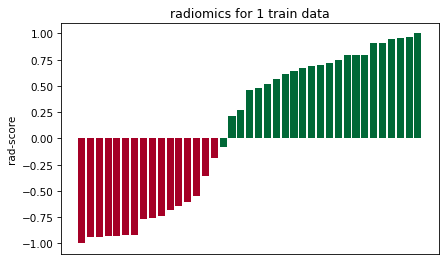

<Figure size 640x480 with 0 Axes>

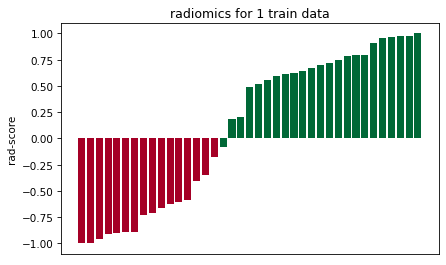

<Figure size 640x480 with 0 Axes>

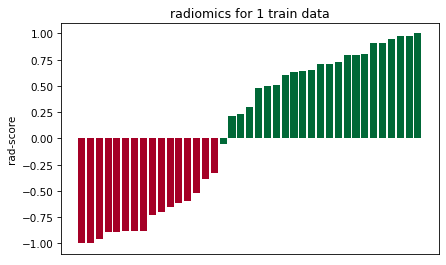

<Figure size 640x480 with 0 Axes>

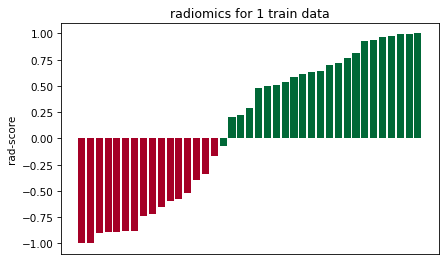

<Figure size 640x480 with 0 Axes>

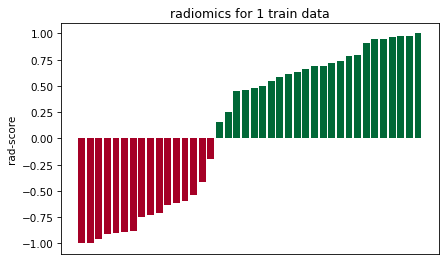

<Figure size 640x480 with 0 Axes>

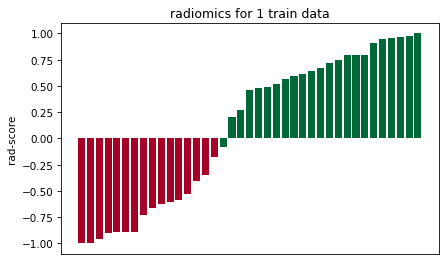

<Figure size 640x480 with 0 Axes>

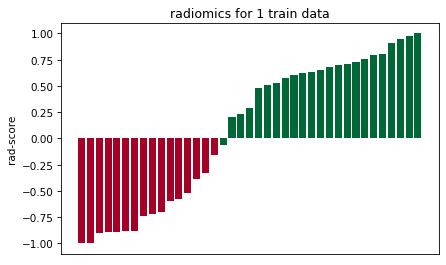

<Figure size 640x480 with 0 Axes>

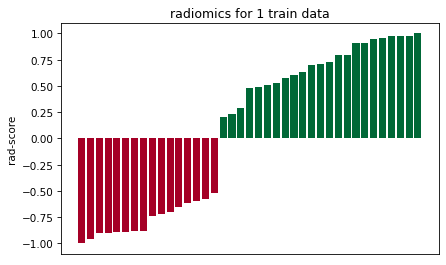

<Figure size 640x480 with 0 Axes>

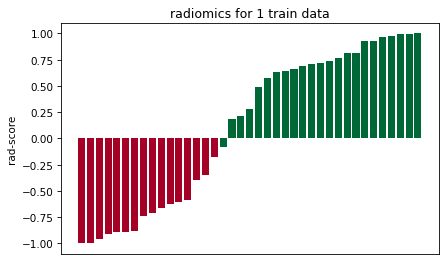

<Figure size 640x480 with 0 Axes>

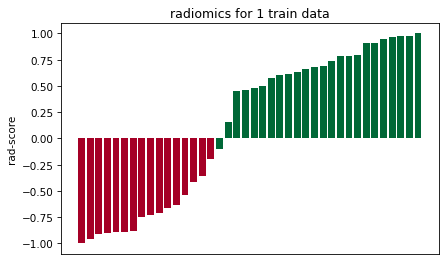

<Figure size 640x480 with 0 Axes>

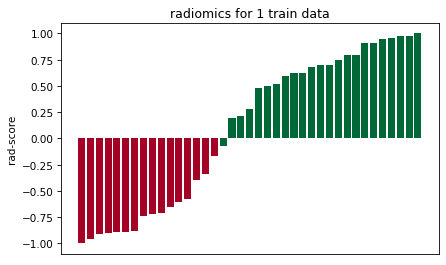

<Figure size 640x480 with 0 Axes>

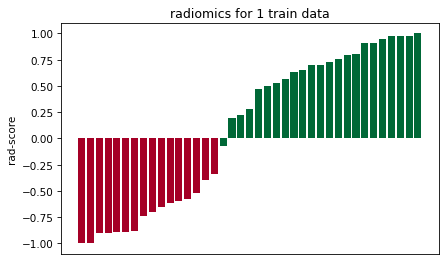

<Figure size 640x480 with 0 Axes>

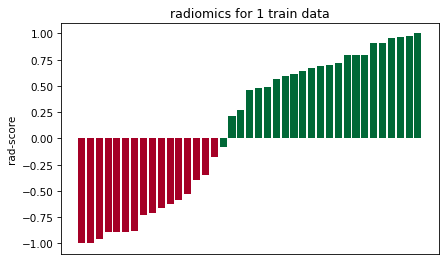

<Figure size 640x480 with 0 Axes>

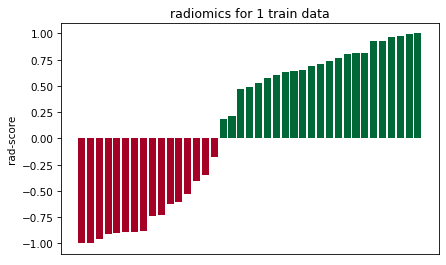

<Figure size 640x480 with 0 Axes>

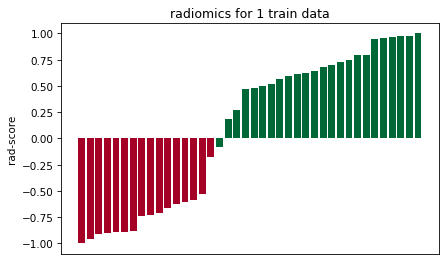

<Figure size 640x480 with 0 Axes>

In [103]:
list_acc = []
list_sensitivity = []
list_specificity = []
list_ppv = []
list_npv = []
list_auc = []
output = 'cpc12 34/output_1/LOG'
data_use = '数据一'
svm_use = 0

if data_use == '数据三':
        plt_title = 'radiomics for 4 train data'
        sheetlist = ['sheet0','sheet1','sheet2','sheet3']
elif data_use == '数据二':
    plt_title = 'radiomics for 3 train data'   
    sheetlist = ['sheet1','sheet2','sheet3']
elif data_use == '数据一':
    plt_title = 'radiomics for 1 train data' 
    sheetlist = ['sheet0']





def pre_data(data,suffix):
    
    data = data.fillna(0)
    data = data.loc[:, data.nunique() != 1] #如果某列所有值相同，则去除
    data = data.drop_duplicates(subset=None, keep='first') #对行进行去重
    data = data.drop(['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash'], axis=1)
    data = data.drop(['diagnostics_Image-original_Spacing','diagnostics_Image-original_Size',\
                     'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size',\
                      'diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex',\
                      'diagnostics_Mask-original_CenterOfMass'],axis=1)
    data = data.add_suffix(suffix)
    
    return data
for i in range(3):
    # 1. 数据整理及准备
    # 分别读取存活和死亡excel
    xlsx1_filePath = '1_2cpc_time0.xlsx' # 存活病例
    xlsx2_filePath = '3_4cpc_time0.xlsx' # 死亡病例
    
    dataall = []
    for sheet in sheetlist:
        data_1 = pd.read_excel(xlsx1_filePath,sheet_name=sheet)
        data_2 = pd.read_excel(xlsx2_filePath,sheet_name=sheet)
        data_1 = pre_data(data_1,'_'+sheet[-1])
        data_2 = pre_data(data_2,'_'+sheet[-1])
        dataall.append(data_1)
        dataall.append(data_2)

#     data_1 = pd.read_excel('GM+WM+CSF+mask_01.xlsx',sheet_name='sheet0')
#     data_2 = pd.read_excel('GM+WM+CSF+mask_02.xlsx',sheet_name='sheet0')
#     data_1 = pre_data(data_1,'_'+str(0))
#     data_2 = pre_data(data_2,'_'+str(0))
#     dataall.append(data_1)
#     dataall.append(data_2)

    if data_use == '数据三':
        data_1 = pd.concat([dataall[0],dataall[2],dataall[4],dataall[6]],1)
        data_2 = pd.concat([dataall[1],dataall[3],dataall[5],dataall[7]],1)
    elif data_use == '数据二':
        data_1 = pd.concat([dataall[0],dataall[2],dataall[4]],1)
        data_2 = pd.concat([dataall[1],dataall[3],dataall[5]],1)

    rows_1,__ = data_1.shape
    rows_2,__ = data_2.shape
    # 将两个excel分别赋予生存/死亡标签（1/2）
    data_1.insert(0,'label',[1]*rows_1)
    data_2.insert(0,'label',[2]*rows_2)
    # 将1，2混合并且打乱，构建一个全部的Datafream
    data = pd.concat([data_1,data_2])

    #data = data.fillna(0)
    #data = data.loc[:, data.nunique() != 1] #如果某列所有值相同，则去除
    #data = data.drop_duplicates(subset=None, keep='first') #对行进行去重
    #data = data.drop(['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash'], axis=1)
    #data = data.drop(['diagnostics_Image-original_Spacing','diagnostics_Image-original_Size',\
                     #'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size',\
                     # 'diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex',\
                      #'diagnostics_Mask-original_CenterOfMass'],axis=1)
    
    data = shuffle(data)
    data = data.dropna(axis=1,how='any')
    X = data[data.columns[1:]]
    y = data['label']
    colNames = X.columns
    X = X.astype(np.float64)
    X = StandardScaler().fit_transform(X) # new knowledge
    X = pd.DataFrame(X)
    X.columns = colNames
    # 2. LASSO method lasso的方法
    alphas = np.logspace(-1.7859,-1.7858,2)
    #alphas = np.array([0.1259888167472170, 0.1259888167472171])
    #alphas = np.logspace(-10,-2,2,base=10)
    #0.018087131537272153 (0.99125, 69, 0.8977777777777778, 0.95)
    # 180天 (-1.847,-1.846,2)
    # 7天   (-1.7033,-1.7032,2)
    # 90天 (-1.7859,-1.7858,2)
    #print(alphas)
    model_lassoCV = LassoCV(alphas=alphas, cv=5, max_iter=100000).fit(X,y) #cv, cross-validation
    #model_lassoCV = LassoCV(eps=0.01,n_alphas=300,cv=5).fit(X,y)
    print(model_lassoCV.alpha_) # lasso求解得到的最优参数，原理通过mse最小
    # #做mse图
    # MSEs = model_lassoCV.mse_path_ # 所以Lamda下MSEs
    # """
    # MSEs_mean, MSEs_std = [], []
    # for i in range(len(MSEs)):
    #     MSEs_mean.append(MSEs[i].mean())   #初学者写法
    #     MSEs_std.append(MSEs[i].std())
    # """
    # MSEs_mean = np.apply_along_axis(np.mean,1,MSEs)
    # MSEs_std = np.apply_along_axis(np.std,1,MSEs)
    # plt.figure()##分辨率pdi = 300
    # plt.errorbar(model_lassoCV.alphas_,MSEs_mean    #x, y数据，一一对应
    #              , yerr=MSEs_std                    #y误差范围
    #              , fmt="o"                          #数据点标记
    #              , ms=3                             #数据点大小
    #              , mfc="r"                          #数据点颜色
    #              , mec="r"                          #数据点边缘颜色
    #              , ecolor="lightblue"               #误差棒颜色
    #              , elinewidth=2                     #误差棒线宽
    #              , capsize=4                        #误差棒边界线长度
    #              , capthick=1)                      #误差棒边界线厚度
    # plt.semilogx() #取对数坐标log
    # plt.axvline(model_lassoCV.alpha_,color = 'black',ls="--")
    # plt.xlabel('Lambda')#横坐标
    # plt.ylabel('MSE') #纵坐标
    # ax = plt.gca()
    # y_major_locator = MultipleLocator(0.05)
    # ax.yaxis.set_major_locator(y_major_locator)
    # plt.show()
    #print(np.abs(X.T.dot(y)).max() / len(X))
    coef = pd.Series(model_lassoCV.coef_,index=X.columns) # 所有特征的lasso权重，筛选出来的特征 coef ！=0，剔除掉的特征coef ==0
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)))

    not_zero = []
    for coe in coef:
        if coe != 0:
            not_zero.append(coe)
    X.columns[coef != 0].tolist()
    coef_table = {'features': X.columns[coef != 0].tolist(), 'coefficient': not_zero}
    coef_pd = pd.DataFrame.from_dict(coef_table)
    print(coef_pd) # 打印出来筛选出来的特征及其系数
    coef_pd.to_excel("./{}/sampleList_90.xlsx".format(output))
    index = coef[coef != 0].index
    X = X[index]
    # radscore计算公式
    formula_res = 'signature = '
    for col in coef_pd['features'].values.tolist():
        formula_res = formula_res + str(col) + "*" + str(coef_pd[coef_pd['features'] == col]['coefficient'].values[0])
    print(formula_res)
    #特征系数Lambda变化曲线/每个特征值随Lambda变化
    # coefs = model_lassoCV.path(X,y,alphas = alphas, max_iter = 100000)[1].T #T转置
    # plt.figure()
    # plt.semilogx(model_lassoCV.alphas_,coefs, '-')
    # z = model_lassoCV.alphas_
    # x = coefs
    # plt.axvline(model_lassoCV.alpha_,color = 'black',ls="--")
    # plt.xlabel('Lambda')
    # plt.ylabel('Coefficients')
    # plt.show()
    # 3.  DataFrame covert to array
    X = X.values
    y = y.values
    # 五折交叉验证
    score_all = 0
    acc = 0
    recall = 0
    specificity = 0
    precision = 0
    npv = 0
    AUC = 0
    i = 1
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # enumerate the splits and summarize the distributions
    for train_ix, test_ix in kfold.split(X, y):
    # select rows
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
        train_1, train_2 = len(train_y[train_y==1]), len(train_y[train_y==2])
        test_1, test_2 = len(test_y[test_y==1]), len(test_y[test_y==2])
        print('>Train: 1=%d, 2=%d, Test: 1=%d, 2=%d' % (train_1, train_2, test_1, test_2))
        radscore = []
        for patients in  X[train_ix]:
            weight = np.array(not_zero)
            score = np.dot(patients,weight)
            radscore.append(score)
        rad_score = np.array(radscore) # 得到每个病例的rad score
        # 根据存活和死亡的患者得分做瀑布图
        results = rad_score.reshape(-1, 1)
        scaler = StandardScaler()
        results = scaler.fit_transform(results)
        results = (results.flatten())
        a = np.where(results < 0)
        results[np.where(results < 0)] = results[np.where(results < 0)] / abs(min(results))
        results[np.where(results > 0)] = results[np.where(results > 0)] / max(results)
        plt.style.use('seaborn-bright')
        plt.figure(figsize=(6.5, 4), dpi=75)
        # plt.style.use('fivethirtyeight')
        plt.bar(np.arange(len(results)), results[results.argsort()],
            color=cm.get_cmap(name='RdYlGn')(plt.Normalize(train_y.min(), train_y.max())(train_y[results.argsort()])))
        plt.xticks([])
        plt.ylabel('rad-score')
        plt.title(plt_title)
        # plt.show()
        plt.savefig('./{}/rad_score'.format(output) + str(i) + '.png')
        # SVM分类器
        classifier1 = svm.SVC(kernel='linear', gamma='auto', probability=True)
        model_svm = svm.SVC(kernel='linear', gamma='auto', probability=True).fit(train_X, train_y)
        score_svm = model_svm.score(test_X,test_y)
        # 逻辑回归分类器
        classifier2 = LogisticRegression(solver='lbfgs',random_state=0)
        model_log = classifier2.fit(train_X, train_y)
        a=model_log.intercept_
        b=model_log.coef_
        fileObject = open('./{}/sampleList.txt'.format(output), 'w')
        fileObject.write(str(a))
        fileObject.write('\n')
        for ip in b.tolist():
            fileObject.write(str(ip))
            fileObject.write('\n')
        fileObject.close()

        radscore = []
        for patients in  X[train_ix]:
            score = a+np.dot(b,patients)
            radscore.append(score)
        rad_score = np.array(radscore) # 得到每个病例的rad score


        # results = rad_score.reshape(-1, 1)
        # scaler = StandardScaler()
        # results = scaler.fit_transform(results)
        # results = (results.flatten())
        # a = np.where(results < 0)
        # results[np.where(results < 0)] = results[np.where(results < 0)] / abs(min(results))
        # results[np.where(results > 0)] = results[np.where(results > 0)] / max(results)
        # plt.style.use('seaborn-bright')
        # plt.figure(figsize=(6.5, 4), dpi=75)
        # # plt.style.use('fivethirtyeight')
        # plt.bar(np.arange(len(results)), results[results.argsort()],
        #     color=cm.get_cmap(name='RdYlGn')(plt.Normalize(train_y.min(), train_y.max())(train_y[results.argsort()])))
        # plt.xticks([])
        # plt.ylabel('rad-score')
        # plt.title('radiomics for 7 day train data')
        # #plt.show()
        # plt.savefig('./output/rad_score' + str(i) + '.png')
        # #绘制SVM ROC曲线
        def roc_svm ():
            y_probs =  model_svm.predict_proba(test_X)
            # roc_curve的输入为
            # y: 样本标签
            # scores: 模型对样本属于正例的概率输出
            # pos_label: 标记为正例的标签，本例中标记为2的即为正例
            fpr, tpr, threshold = roc_curve(test_y, y_probs[:,0], pos_label = 1)  # # # 计算真正率和假正率
            roc_auc = auc(fpr, tpr)  # ##计算auc的值
            plt.plot(fpr, tpr, 'b', label='SVM AUC = %0.2f' % roc_auc)
            plt.legend(loc='lower right')
            plt.plot([0, 1], [0, 1], 'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('1-Specificity')
            plt.ylabel('Sensitivity')
            plt.title('ROC Curve')
            plt.savefig('./{}/svm_models_roc'.format(output) + str(i) + '.png')
            return plt
            #plt.show()
        # #绘制 LOG ROC曲线
        def roc_log():
            y_probs = model_log.predict_proba(test_X)
            # roc_curve的输入为
            # y: 样本标签
            # scores: 模型对样本属于正例的概率输出
            # pos_label: 标记为正例的标签，本例中标记为2的即为正例
            fpr, tpr, threshold = roc_curve(test_y, y_probs[:, 0], pos_label=1)  # # # 计算真正率和假正率
            roc_auc = auc(fpr, tpr)  # ##计算auc的值
            plt.plot(fpr, tpr, 'b', label='Logistic Regression AUC = %0.2f' % roc_auc)
            plt.legend(loc='lower right')
            plt.plot([0, 1], [0, 1], 'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('1-Specificity')
            plt.ylabel('Sensitivity')
            plt.title('ROC Curve')
            plt.savefig('./{}/log_models_roc'.format(output)+str(i)+'.png')
            #plt.show()
            return plt
        # 绘制ROC曲线2
        # y_score = model_svm.fit(train_X, train_y).decision_function(test_X)
        # fpr, tpr, threshold = roc_curve(test_y, y_score, pos_label = 2)  ###计算真正率和假正率
        # roc_auc = auc(fpr, tpr)  ###计算auc的值
        # lw = 2
        # plt.figure(figsize=(10, 10))
        # plt.plot(fpr, tpr, color='darkorange',
        #      lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
        # plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        # plt.xlim([0.0, 1.0])
        # plt.ylim([0.0, 1.05])
        # plt.xlabel('Specificity')
        # plt.ylabel('Sensitive')
        # plt.title('Roc curve in test')
        # plt.legend(loc="lower right")
        # plt.show()
        #绘制两个曲线在一张图·
        def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpin=100):
            """
            将多个机器模型的roc图输出到一张图上

            Args:
                names: list, 多个模型的名称
                sampling_methods: list, 多个模型的实例化对象
                save: 选择是否将结果保存（默认为png格式）

            Returns:
                返回图片对象plt
            """
            plt.figure(figsize=(6.4, 4.8), dpi=dpin)
            for (name, method, colorname) in zip(names, sampling_methods, colors):

                method.fit(train_X, train_y)
                y_test_preds = method.predict(test_X)
                y_test_predprob = method.predict_proba(test_X)[:, 0]
                fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)

                plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)), color=colorname)
                plt.plot([0, 1], [0, 1], '--', lw=5, color='grey')
                #plt.axis('square')
                plt.xlim([0, 1])
                plt.ylim([0, 1])
                # plt.xlabel('False Positive Rate', fontsize=20)
                # plt.ylabel('True Positive Rate', fontsize=20)
                plt.xlabel('1-Specificity')
                plt.ylabel('Sensitivity')
                plt.title('ROC Curve')
                plt.legend(loc='lower right')
            if save:
                     plt.savefig('./{}/multi_models_roc'.format(output)+str(i)+'.png')

            return plt

        # roc_svm()
        # plt.clf()
        # roc_log()
        # plt.clf()
        multi_models_roc(['SVM','Logistic Regression'], [classifier1, classifier2], ['steelblue', 'crimson',], test_X, test_y, save=True, dpin=100)
        plt.clf()
        i += 1

        if svm_use:
            res=model_svm.predict(test_X)
            y_probs = model_svm.predict_proba(test_X)
        else:
            res=model_log.predict(test_X)
            y_probs = model_log.predict_proba(test_X)
        fpr, tpr, threshold = roc_curve(test_y, y_probs[:, 0], pos_label=1)  # # # 计算真正率和假正率
        roc_auc = auc(fpr, tpr)
        AUC += roc_auc
        #res=model_log.predict(test_X)
        TP=(res[test_y==1]==1).sum()
        FN=(res[test_y==1]==2).sum()
        FP=(res[test_y==2]==1).sum()
        TN=(res[test_y==2]==2).sum()

        # TPR = TP/(TP+FN)
        # FPR = FP/(FP+TN)
        # print("FPR:"+str(FPR)+"TPR:"+str(TPR))
        print('TP:%d FN:%d FP:%d TN:%d'%(TP,FN,FP,TN))


        ACC = (TP+TN)/(TP+TN+FP+FN)
        Recall = TP/(TP+FN) # Sensitivity
        Specificity = TN/(TN+FP)
        Precision = TP/(TP+FP) #ppv
        NPV = TN/(TN+FN)

        print("ACC：",ACC)
        print("Recall：",Recall)
        print("Specificity：",Specificity)
        print("Precision：",Precision)
        print("NPV：",NPV)
        print("AUC：", roc_auc)
        #print("准确率：",score_svm)

        acc += ACC
        recall += Recall
        specificity += Specificity
        precision += Precision
        npv += NPV
        #score_all += score_svm
    #a = score_all/5
    b = acc/5
    c = recall/5
    d = precision/5
    e = 2*d*c/(d+c)
    f = specificity/5
    g = npv/5
    h = AUC / 5
    #print('总得分：',a)
    print('acc：',b)
    print('recall：',c)
    print('precision：',d)
    print('F1：',e)
    print('specificity：',f)
    print('npv：',g)
    print('auc：', h)
    list_acc.append(b)
    list_sensitivity.append(c)
    list_specificity.append(f)
    list_ppv.append(d)
    list_npv.append(g)
    list_auc.append(h)
#求均值
arr_mean = np.mean(list_acc)
#求标准差
arr_std = np.std(list_acc,ddof=1)
print("acc"+"平均值为：%f" % arr_mean + "标准差为:%f" % arr_std)

arr_mean1 = np.mean(list_sensitivity)
#求标准差
arr_std1 = np.std(list_sensitivity,ddof=1)
print("sensitivity"+"平均值为：%f" % arr_mean1 + "标准差为:%f" % arr_std1)

arr_mean2 = np.mean(list_specificity)
#求标准差
arr_std2 = np.std(list_specificity,ddof=1)
print("specificity"+"平均值为：%f" % arr_mean2+ "标准差为:%f" % arr_std2)

arr_mean3 = np.mean(list_ppv)
#求标准差
arr_std3 = np.std(list_ppv,ddof=1)
print("ppv"+"平均值为：%f" % arr_mean3+ "标准差为:%f" % arr_std3)

arr_mean4 = np.mean(list_npv)
#求标准差
arr_std4 = np.std(list_npv,ddof=1)
print("npv"+"平均值为：%f" % arr_mean4+ "标准差为:%f" % arr_std4)

arr_mean5 = np.mean(list_auc)
#求标准差
arr_std5= np.std(list_auc,ddof=1)
print("auc"+"平均值为：%f" % arr_mean5 + "标准差为:%f" % arr_std5)

if svm_use:
    c = 'SVM'
else:
    c = 'LOG'

result_all[data_use][c].append((arr_mean, arr_std))
result_all[data_use][c].append((arr_mean1, arr_std1))
result_all[data_use][c].append((arr_mean2, arr_std2))
result_all[data_use][c].append((arr_mean3, arr_std3))
result_all[data_use][c].append((arr_mean4, arr_std4))
result_all[data_use][c].append((arr_mean5, arr_std5))    

In [45]:
result_all

{'数据一': {'LOG': [(0.8222222222222223, 0.023094010767585115),
   (0.75, 0.050000000000000044),
   (0.8777777777777778, 0.01924500897298752),
   (0.8411111111111111, 0.01347150628109131),
   (0.8541269841269842, 0.019344902316988197),
   (0.8927777777777779, 0.011706281947614193)],
  'SVM': [(0.8037037037037037, 0.0315315505982114),
   (0.75, 0.0),
   (0.84, 0.05456901847914966),
   (0.7766666666666667, 0.05783117190965823),
   (0.8473015873015873, 0.015860312376884796),
   (0.8833333333333334, 0.02020725942163691)]},
 '数据二': {'LOG': [(1.0, 0.0),
   (1.0, 0.0),
   (1.0, 0.0),
   (1.0, 0.0),
   (1.0, 0.0),
   (1.0, 0.0),
   (0.9933333333333333, 0.011547005383792462),
   (1.0, 0.0),
   (0.9888888888888889, 0.01924500897298746),
   (0.9866666666666667, 0.023094010767585053),
   (1.0, 0.0),
   (1.0, 0.0)],
  'SVM': [(0.985925925925926, 0.012239045660635734),
   (0.9833333333333334, 0.028867513459481315),
   (0.9888888888888889, 0.01924500897298746),
   (0.9866666666666667, 0.0230940107675850

((49, 1876), (49, 1600))

# lasso_auc_select.py

In [96]:
import pandas as pd
import numpy as np
from matplotlib import cm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score




# output = 'lab4/output_4/SVM'
data_use = '数据一'
# svm_use = 1

if data_use == '数据三':
        plt_title = 'radiomics for 4 train data'
        sheetlist = ['sheet0','sheet1','sheet2','sheet3']
elif data_use == '数据二':
    plt_title = 'radiomics for 3 train data'   
    sheetlist = ['sheet1','sheet2','sheet3']
elif data_use == '数据一':
    plt_title = 'radiomics for 1 train data' 
    sheetlist = ['sheet0']



def pre_data(data,suffix):
    
    data = data.fillna(0)
    data = data.loc[:, data.nunique() != 1] #如果某列所有值相同，则去除
    data = data.drop_duplicates(subset=None, keep='first') #对行进行去重
    data = data.drop(['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash'], axis=1)
    data = data.drop(['diagnostics_Image-original_Spacing','diagnostics_Image-original_Size',\
                     'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size',\
                      'diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex',\
                      'diagnostics_Mask-original_CenterOfMass'],axis=1)
    data = data.add_suffix(suffix)
    
    return data

# 1. 数据整理及准备
# 分别读取存活和死亡excel
xlsx1_filePath = '1_2cpc_time0.xlsx' # 存活病例
xlsx2_filePath = '3_4cpc_time0.xlsx' # 死亡病例

dataall = []
for sheet in sheetlist:
    data_1 = pd.read_excel(xlsx1_filePath,sheet_name=sheet)
    data_2 = pd.read_excel(xlsx2_filePath,sheet_name=sheet)
    data_1 = pre_data(data_1,'_'+sheet[-1])
    data_2 = pre_data(data_2,'_'+sheet[-1])
    dataall.append(data_1)
    dataall.append(data_2)

if data_use == '数据三':
    data_1 = pd.concat([dataall[0],dataall[2],dataall[4],dataall[6]],1)
    data_2 = pd.concat([dataall[1],dataall[3],dataall[5],dataall[7]],1)
elif data_use == '数据二':
    data_1 = pd.concat([dataall[0],dataall[2],dataall[4]],1)
    data_2 = pd.concat([dataall[1],dataall[3],dataall[5]],1)

rows_1,__ = data_1.shape
rows_2,__ = data_2.shape
# 将两个excel分别赋予生存/死亡标签（1/2）
data_1.insert(0,'label',[1]*rows_1)
data_2.insert(0,'label',[2]*rows_2)
# 将1，2混合并且打乱，构建一个全部的Datafream
data = pd.concat([data_1,data_2])

data = shuffle(data)
data = data.dropna(axis=1,how='any')



data_X = data[data.columns[1:]]
data_y = data['label']
colNames = data_X.columns
data_X = data_X.astype(np.float64)
data_X = StandardScaler().fit_transform(data_X) # new knowledge
data_X = pd.DataFrame(data_X)
data_X.columns = colNames


alphas = np.logspace(-3,-0.8538,100)




###   0.012753170967264126
print(alphas)
dic= {}
auclist = []
aucstd = []
auc_std = []
for i in alphas:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    i = np.array([i,i])
    for train_ix, test_ix in kfold.split(data_X, data_y):
       
        X, test_X = data_X.iloc[train_ix], data_X.iloc[test_ix]
        y, test_y = data_y.iloc[train_ix], data_y.iloc[test_ix]
        
        model_lassoCV = LassoCV(alphas=i, cv=5, max_iter=100000).fit(X,y)
        coef = pd.Series(model_lassoCV.coef_, index=X.columns)  # 所有特征的lasso权重，筛选出来的特征 coef ！=0，剔除掉的特征coef ==0
        print('参数'+str(model_lassoCV.alpha_)+':'+"Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)))
        if sum(coef != 0) == 0:
            continue
        not_zero = []
        for coe in coef:
            if coe != 0:
                not_zero.append(coe)
        X.columns[coef != 0].tolist()#将系数不为0的特征做成一个列表
        coef_table = {'features': X.columns[coef != 0].tolist(), 'coefficient': not_zero}
        coef_pd = pd.DataFrame.from_dict(coef_table)
        print(coef_pd) # 打印出来筛选出来的特征及其系数

        index = coef[coef != 0].index
        X = X[index]
        test_X = test_X[index]



        AUC = 0
        aucc = 0
        specificity=0
        sensitivity=0
        specificity1 = 0
        sensitivity1 = 0
        X = X.values
        y = y.values
        test_X = test_X.values
        test_y = test_y.values
        # enumerate the splits and summarize the distributions
    
        # summarize train and test composition
        train_1, train_2 = len(y[y == 1]), len(y[y == 2])
        test_1, test_2 = len(test_y[test_y == 1]), len(test_y[test_y == 2])
        print('>Train: 1=%d, 2=%d, Test: 1=%d, 2=%d' % (train_1, train_2, test_1, test_2))
        # classifier1 = svm.SVC(kernel='linear', gamma='auto', probability=True)
        # model_svm = svm.SVC(kernel='linear', gamma='auto', probability=True).fit(train_X, train_y)
        classifier2 = LogisticRegression(solver='lbfgs', random_state=0, max_iter=1000)
        model_log = classifier2.fit(X, y)
        y_probs = model_log.predict_proba(test_X)
        fpr, tpr, threshold = roc_curve(test_y, y_probs[:, 0], pos_label=1)
        roc_auc = auc(fpr, tpr)
        res = model_log.predict(test_X)
        # res=model_svm.predict(test_X)
        TP = (res[test_y == 1] == 1).sum()
        FN = (res[test_y == 1] == 2).sum()
        FP = (res[test_y == 2] == 1).sum()
        TN = (res[test_y == 2] == 2).sum()
        Specificity = TN / (TN + FP)
        Sensitivity = TP/(TP+FN)
        #auc_score = roc_auc_score(test_y, y_probs)
        print('参数'+':'+ str(model_lassoCV.alpha_)+':'+'AUC'+':'+str(roc_auc))
        aucstd.append(roc_auc)
        specificity += Specificity
        sensitivity += Sensitivity
        AUC += roc_auc
    aucc = AUC/5
    specificity1 = specificity/5
    sensitivity1 = sensitivity/5
    print('AUC的值为' + str(aucc)+'specificity的值为'+ str(specificity1) + 'sensitivity的值为'+ str(sensitivity1))
    auclist.append(aucc)
    arr_std = np.std(aucstd, ddof=1)
    auc_std.append(arr_std)

    dic[model_lassoCV.alpha_] = aucc,len(not_zero),sensitivity1,specificity1
def select_max():
    for key, value in dic.items():
        if (value == max(dic.values())):
            print(key, value)
            break
    return key
select_max()



[0.001      0.00105118 0.00110499 0.00116155 0.001221   0.00128349
 0.00134919 0.00141825 0.00149084 0.00156714 0.00164736 0.00173168
 0.00182031 0.00191348 0.00201142 0.00211437 0.0022226  0.00233636
 0.00245594 0.00258165 0.00271379 0.00285269 0.0029987  0.00315219
 0.00331353 0.00348313 0.00366141 0.00384882 0.00404582 0.0042529
 0.00447058 0.0046994  0.00493993 0.00519278 0.00545857 0.00573796
 0.00603165 0.00634038 0.0066649  0.00700604 0.00736464 0.00774159
 0.00813784 0.00855437 0.00899221 0.00945247 0.00993629 0.01044487
 0.01097948 0.01154146 0.0121322  0.01275317 0.01340593 0.0140921
 0.01481339 0.0155716  0.01636862 0.01720644 0.01808713 0.01901291
 0.01998606 0.02100903 0.02208436 0.02321473 0.02440296 0.025652
 0.02696497 0.02834515 0.02979597 0.03132105 0.03292419 0.03460939
 0.03638084 0.03824296 0.04020039 0.04225801 0.04442095 0.0466946
 0.04908462 0.05159698 0.05423792 0.05701404 0.05993225 0.06299983
 0.06622442 0.06961406 0.07317719 0.0769227  0.08085992 0.08499867


参数0.001:Lasso picked 40 variables and eliminated the other 1496
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.218187
1                         original_glcm_Correlation_0     0.069120
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.029661
3                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.085678
4                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.136142
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.127222
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.038204
7             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.145430
8                     wavelet-LLH_firstorder_Median_0     0.038844
9   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.158404
10  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.030810
11  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.001562
12  wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.02620

参数0.0010511841112905973:Lasso picked 39 variables and eliminated the other 1497
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.140551
1                  original_firstorder_10Percentile_0    -0.100167
2                                original_glcm_Imc1_0    -0.122088
3                  original_glcm_MaximumProbability_0    -0.100709
4             original_glszm_GrayLevelNonUniformity_0    -0.092093
5      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.099282
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.105116
7           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.096758
8       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.032325
9   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.007184
10  log-sigma-1-0-mm-3D_glszm_SizeZoneNonUniformit...     0.002471
11                    log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.061262
12                    log-sigma-3-0-mm-3D_glcm_Id

参数0.0010511841112905973:Lasso picked 42 variables and eliminated the other 1494
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.081940
1                  original_glcm_MaximumProbability_0    -0.123451
2                        original_glrlm_RunVariance_0     0.067901
3                  original_glszm_LargeAreaEmphasis_0     0.047831
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.235815
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.147757
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.008246
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.123091
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.011910
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.080013
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.479869
11                    wavelet-LLH_firstorder_Median_0     0.029398
12                            wavelet-LLH_glcm_Id

参数0.001104988035829802:Lasso picked 39 variables and eliminated the other 1497
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.011703
1             original_shape_Maximum2DDiameterSlice_0     0.165369
2                    original_shape_MinorAxisLength_0     0.079092
3                  original_firstorder_10Percentile_0    -0.038610
4                                original_glcm_Imc1_0    -0.078783
5                  original_glcm_MaximumProbability_0    -0.093383
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.094793
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.165863
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.033573
9   log-sigma-1-0-mm-3D_glrlm_LongRunLowGrayLevelE...     0.003268
10      log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.140440
11               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.171928
12            log-sigma-3-0-mm-3D_firstorder_Media

参数0.0011615458664304933:Lasso picked 39 variables and eliminated the other 1497
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.003348
1               original_shape_Maximum2DDiameterRow_0     0.256280
2                  original_firstorder_10Percentile_0    -0.055195
3                                original_glcm_Imc1_0    -0.115917
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.206711
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.209046
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.051049
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.063173
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.160273
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.138897
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.027520
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.143437
12                       wavelet-LHL_ngtdm_Contra

参数0.0011615458664304933:Lasso picked 40 variables and eliminated the other 1496
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.217083
1                         original_glcm_Correlation_0     0.068901
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.030732
3                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.087488
4                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.134263
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.123791
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.036652
7             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.145135
8                     wavelet-LLH_firstorder_Median_0     0.038474
9   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.156159
10  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.030498
11  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.000516
12  wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphas

参数0.0012209985593270038:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.139602
1                  original_firstorder_10Percentile_0    -0.101693
2                                original_glcm_Imc1_0    -0.121922
3                  original_glcm_MaximumProbability_0    -0.103689
4             original_glszm_GrayLevelNonUniformity_0    -0.084849
5      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.099157
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.092701
7           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.103932
8       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.045534
9   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.002681
10                    log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.058362
11                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.123284
12         log-sigma-3-0-mm-3D_glcm_InverseVarian

参数0.0012209985593270038:Lasso picked 44 variables and eliminated the other 1492
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.084133
1                  original_glcm_MaximumProbability_0    -0.123184
2                        original_glrlm_RunVariance_0     0.067766
3                  original_glszm_LargeAreaEmphasis_0     0.049187
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.236976
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.148413
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.005846
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.121226
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.010486
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.080677
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.479144
11                    wavelet-LLH_firstorder_Median_0     0.026475
12                            wavelet-LLH_glcm_Id

参数0.0012834942854732562:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.011254
1             original_shape_Maximum2DDiameterSlice_0     0.165323
2                    original_shape_MinorAxisLength_0     0.076424
3                  original_firstorder_10Percentile_0    -0.037823
4                                original_glcm_Imc1_0    -0.074290
5                  original_glcm_MaximumProbability_0    -0.090680
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.089146
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.166132
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.029978
9   log-sigma-1-0-mm-3D_glrlm_LongRunLowGrayLevelE...     0.001993
10      log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.136887
11               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.169661
12            log-sigma-3-0-mm-3D_firstorder_Medi

参数0.0013491887998217638:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.003580
1               original_shape_Maximum2DDiameterRow_0     0.255556
2                  original_firstorder_10Percentile_0    -0.049755
3                                original_glcm_Imc1_0    -0.114652
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.207565
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.206308
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.050134
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.062098
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.160840
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.137462
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.027828
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.143099
12                       wavelet-LHL_ngtdm_Contra

参数0.0013491887998217638:Lasso picked 43 variables and eliminated the other 1493
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.085832
1                  original_glcm_MaximumProbability_0    -0.121701
2                        original_glrlm_RunVariance_0     0.065627
3                  original_glszm_LargeAreaEmphasis_0     0.049267
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.234957
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.147715
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.005907
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.121313
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.009131
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.079306
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.478398
11                    wavelet-LLH_firstorder_Median_0     0.026171
12                            wavelet-LLH_glcm_Id

参数0.0014182458295038684:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.010456
1             original_shape_Maximum2DDiameterSlice_0     0.165809
2                    original_shape_MinorAxisLength_0     0.073832
3                  original_firstorder_10Percentile_0    -0.038067
4                                original_glcm_Imc1_0    -0.069903
5                  original_glcm_MaximumProbability_0    -0.088139
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.084264
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.166955
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.027773
9   log-sigma-1-0-mm-3D_glrlm_LongRunLowGrayLevelE...     0.001294
10      log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.135031
11               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.167594
12            log-sigma-3-0-mm-3D_firstorder_Medi

参数0.0014908374818786187:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.004061
1               original_shape_Maximum2DDiameterRow_0     0.255954
2                  original_firstorder_10Percentile_0    -0.044462
3                                original_glcm_Imc1_0    -0.113076
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.207625
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.203532
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.049664
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.061114
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.161088
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.136622
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.028226
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.142839
12                       wavelet-LHL_ngtdm_Contra

参数0.0014908374818786187:Lasso picked 43 variables and eliminated the other 1493
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.088351
1                  original_glcm_MaximumProbability_0    -0.119082
2                        original_glrlm_RunVariance_0     0.060754
3                  original_glszm_LargeAreaEmphasis_0     0.047411
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.231570
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.146524
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.006020
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.122428
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.006621
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.076633
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.477107
11                    wavelet-LLH_firstorder_Median_0     0.028356
12                            wavelet-LLH_glcm_Id

参数0.001567144673467288:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.009369
1             original_shape_Maximum2DDiameterSlice_0     0.166340
2                    original_shape_MinorAxisLength_0     0.074714
3                  original_firstorder_10Percentile_0    -0.034856
4                                original_glcm_Imc1_0    -0.066779
5                  original_glcm_MaximumProbability_0    -0.086568
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.081376
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.166270
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.029896
9   log-sigma-1-0-mm-3D_glrlm_LongRunLowGrayLevelE...     0.000020
10      log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.130121
11               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.167813
12            log-sigma-3-0-mm-3D_firstorder_Media

参数0.0016473575808425044:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.004480
1               original_shape_Maximum2DDiameterRow_0     0.255350
2                  original_firstorder_10Percentile_0    -0.038765
3                                original_glcm_Imc1_0    -0.111550
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.206857
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.200714
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.049386
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.060405
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.161316
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.135839
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.028418
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.142803
12                       wavelet-LHL_ngtdm_Contra

参数0.0016473575808425044:Lasso picked 43 variables and eliminated the other 1493
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.091627
1                  original_glcm_MaximumProbability_0    -0.117041
2                        original_glrlm_RunVariance_0     0.057414
3                  original_glszm_LargeAreaEmphasis_0     0.045117
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.227920
5                       original_glszm_ZoneVariance_0     0.000070
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.145853
7                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.004979
8   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.123629
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.004902
10  log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.074749
11  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.475129
12                    wavelet-LLH_firstorder_Medi

参数0.001731676114595755:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.008558
1             original_shape_Maximum2DDiameterSlice_0     0.167728
2                    original_shape_MinorAxisLength_0     0.077753
3                  original_firstorder_10Percentile_0    -0.028217
4                                original_glcm_Imc1_0    -0.065364
5                  original_glcm_MaximumProbability_0    -0.085115
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.079416
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.162122
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.032876
9       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.122458
10               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.171652
11            log-sigma-3-0-mm-3D_firstorder_Median_0    -0.087445
12  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph

参数0.0018203104175644933:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.004874
1               original_shape_Maximum2DDiameterRow_0     0.254650
2                  original_firstorder_10Percentile_0    -0.032721
3                                original_glcm_Imc1_0    -0.109875
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.206482
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.197902
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.048689
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.059593
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.161290
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.134954
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.028704
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.142901
12                       wavelet-LHL_ngtdm_Contra

参数0.0018203104175644933:Lasso picked 39 variables and eliminated the other 1497
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.212996
1                         original_glcm_Correlation_0     0.069064
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.036911
3                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.096334
4                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.125899
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.107704
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.029296
7             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.141496
8                     wavelet-LLH_firstorder_Median_0     0.035287
9   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.144348
10  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.028377
11  wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.008348
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmpha

参数0.0019134813885605462:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.134206
1                  original_firstorder_10Percentile_0    -0.069820
2                                original_glcm_Imc1_0    -0.114771
3                  original_glcm_MaximumProbability_0    -0.101330
4             original_glszm_GrayLevelNonUniformity_0    -0.087733
5      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.103914
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.134861
7           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.047335
8       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.039811
9   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.011239
10  log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.006516
11                    log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.070549
12                    log-sigma-3-0-mm-3D_glcm_Id

参数0.0019134813885605462:Lasso picked 41 variables and eliminated the other 1495
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.093226
1                  original_glcm_MaximumProbability_0    -0.114733
2                        original_glrlm_RunVariance_0     0.053077
3                  original_glszm_LargeAreaEmphasis_0     0.044851
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.224681
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.144020
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.004952
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.122767
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.002140
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.073468
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.473856
11                    wavelet-LLH_firstorder_Median_0     0.028090
12                            wavelet-LLH_glcm_Id

参数0.002011421232905116:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.007105
1             original_shape_Maximum2DDiameterSlice_0     0.169211
2                    original_shape_MinorAxisLength_0     0.081705
3                  original_firstorder_10Percentile_0    -0.018374
4                                original_glcm_Imc1_0    -0.062326
5                  original_glcm_MaximumProbability_0    -0.082740
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.074897
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.155615
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.036025
9       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.111251
10               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.177065
11            log-sigma-3-0-mm-3D_firstorder_Median_0    -0.083369
12  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph

参数0.0021143740411424:Lasso picked 36 variables and eliminated the other 1500
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.003449
1               original_shape_Maximum2DDiameterRow_0     0.246301
2                  original_firstorder_10Percentile_0    -0.028119
3                                original_glcm_Imc1_0    -0.109027
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.202604
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.195738
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.044694
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.061166
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.161104
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.133964
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.029740
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.142031
12                       wavelet-LHL_ngtdm_Contrast_

参数0.0021143740411424:Lasso picked 41 variables and eliminated the other 1495
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.096849
1                  original_glcm_MaximumProbability_0    -0.112598
2                        original_glrlm_RunVariance_0     0.049796
3                  original_glszm_LargeAreaEmphasis_0     0.043944
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.221162
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.143432
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.003687
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.123274
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.000412
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.072281
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.472012
11                    wavelet-LLH_firstorder_Median_0     0.026439
12                            wavelet-LLH_glcm_Idmn_

参数0.002222596397374183:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.004891
1             original_shape_Maximum2DDiameterSlice_0     0.167387
2                    original_shape_MinorAxisLength_0     0.081651
3                  original_firstorder_10Percentile_0    -0.013867
4                                original_glcm_Imc1_0    -0.057349
5                  original_glcm_MaximumProbability_0    -0.081594
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.070208
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.155004
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.038171
9       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.106967
10               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.177113
11            log-sigma-3-0-mm-3D_firstorder_Median_0    -0.078650
12  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph

参数0.0023363580187314614:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.001974
1               original_shape_Maximum2DDiameterRow_0     0.238369
2                  original_firstorder_10Percentile_0    -0.025634
3                                original_glcm_Imc1_0    -0.108685
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.198384
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.194526
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.041460
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.063065
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.161034
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.133359
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.030535
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.141234
12                       wavelet-LHL_ngtdm_Contra

参数0.0023363580187314614:Lasso picked 41 variables and eliminated the other 1495
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.100568
1                  original_glcm_MaximumProbability_0    -0.110779
2                        original_glrlm_RunVariance_0     0.046599
3                  original_glszm_LargeAreaEmphasis_0     0.041282
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.217798
5                       original_glszm_ZoneVariance_0     0.000918
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.143470
7                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.001669
8   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.124720
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.070929
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.468994
11                    wavelet-LLH_firstorder_Median_0     0.023351
12                            wavelet-LLH_glcm_Id

参数0.0024559424275768923:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.000614
1             original_shape_Maximum2DDiameterSlice_0     0.161424
2                    original_shape_MinorAxisLength_0     0.082761
3                  original_firstorder_10Percentile_0    -0.007226
4                                original_glcm_Imc1_0    -0.053022
5                  original_glcm_MaximumProbability_0    -0.083533
6      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.068809
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.157034
8              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.049195
9       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.103156
10               log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.176001
11            log-sigma-3-0-mm-3D_firstorder_Median_0    -0.074361
12  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmp

参数0.0025816476581132855:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0                diagnostics_Image-original_Minimum_0     0.000025
1               original_shape_Maximum2DDiameterRow_0     0.229717
2                  original_firstorder_10Percentile_0    -0.024045
3                                original_glcm_Imc1_0    -0.108126
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.193629
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.193580
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.037499
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.065279
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.161049
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.132585
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.031830
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.140247
12                       wavelet-LHL_ngtdm_Contra

参数0.0025816476581132855:Lasso picked 40 variables and eliminated the other 1496
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.104352
1                  original_glcm_MaximumProbability_0    -0.108671
2                        original_glrlm_RunVariance_0     0.043808
3                  original_glszm_LargeAreaEmphasis_0     0.039040
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.214699
5                       original_glszm_ZoneVariance_0     0.002975
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.143490
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.126032
8   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.070564
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.466069
10                    wavelet-LLH_firstorder_Median_0     0.018677
11                            wavelet-LLH_glcm_Idmn_0     0.109053
12  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphas

参数0.002713786999159266:Lasso picked 36 variables and eliminated the other 1500
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.207731
1                         original_glcm_Correlation_0     0.065242
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.042027
3                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.100725
4                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.118094
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.091750
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.023156
7             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.138916
8                     wavelet-LLH_firstorder_Median_0     0.035737
9   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.135014
10  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.028067
11  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.165677
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.00285268977494321:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.121401
1                  original_firstorder_10Percentile_0    -0.051214
2                                original_glcm_Imc1_0    -0.102295
3                  original_glcm_MaximumProbability_0    -0.099429
4             original_glszm_GrayLevelNonUniformity_0    -0.074533
5      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.100647
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.172144
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.048998
8   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.016237
9   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.024257
10                    log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.070529
11                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.098325
12                            wavelet-LLH_glcm_Imc2

参数0.00299870216586145:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.208420
1                  original_firstorder_10Percentile_0    -0.011797
2                         original_glcm_Correlation_0     0.018701
3                                original_glcm_Imc1_0    -0.092320
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.181038
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.187062
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.036298
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.068583
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.160210
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.131796
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.028040
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.141472
12                       wavelet-LHL_ngtdm_Contrast

参数0.00299870216586145:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.107412
1                  original_glcm_MaximumProbability_0    -0.105493
2                        original_glrlm_RunVariance_0     0.040385
3                  original_glszm_LargeAreaEmphasis_0     0.047931
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.214697
5                       original_glszm_ZoneVariance_0     0.004120
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.143598
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.123594
8   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.074305
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.465757
10                    wavelet-LLH_firstorder_Median_0     0.005222
11                            wavelet-LLH_glcm_Idmn_0     0.096068
12  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis

参数0.003152188071246258:Lasso picked 36 variables and eliminated the other 1500
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.205833
1                         original_glcm_Correlation_0     0.062054
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.042938
3                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.100739
4                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.115195
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.086714
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.021290
7             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.138458
8                     wavelet-LLH_firstorder_Median_0     0.037264
9   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.132620
10  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.028836
11  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.167040
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.0033135300162938164:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.158975
1                    original_shape_MinorAxisLength_0     0.086761
2                                original_glcm_Imc1_0    -0.050471
3                  original_glcm_MaximumProbability_0    -0.085127
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.054827
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.144275
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.039240
7       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.091824
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.176799
9             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.067857
10  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.233233
11                    wavelet-LLH_firstorder_Median_0     0.095636
12         wavelet-LLH_glszm_GrayLevelNonUniformi

参数0.0034831301054125343:Lasso picked 36 variables and eliminated the other 1500
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.116275
1                  original_firstorder_10Percentile_0    -0.036054
2                                original_glcm_Imc1_0    -0.100132
3                  original_glcm_MaximumProbability_0    -0.100110
4             original_glszm_GrayLevelNonUniformity_0    -0.074713
5      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.106339
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.164605
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.041915
8   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.017225
9   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.025874
10                    log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.067204
11                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.093065
12                            wavelet-LLH_glcm_Im

参数0.003661411024367596:Lasso picked 34 variables and eliminated the other 1502
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.184626
1                         original_glcm_Correlation_0     0.029783
2                                original_glcm_Imc1_0    -0.081909
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.167338
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.179870
5                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.034710
6   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.072473
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.159181
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.129156
9   wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.024927
10              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.141713
11                       wavelet-LHL_ngtdm_Contrast_0    -0.097252
12                  wavelet-LHH_firstorder_Kurtosi

参数0.003661411024367596:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.104631
1                  original_glcm_MaximumProbability_0    -0.104294
2                        original_glrlm_RunVariance_0     0.032254
3                  original_glszm_LargeAreaEmphasis_0     0.040813
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.211645
5                       original_glszm_ZoneVariance_0     0.005891
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.140469
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.120265
8   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.070987
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.457111
10                    wavelet-LLH_firstorder_Median_0     0.000630
11                            wavelet-LLH_glcm_Idmn_0     0.087425
12  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasi

参数0.003848817093719447:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.203237
1                         original_glcm_Correlation_0     0.060037
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.046152
3                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.098458
4                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.111213
5          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.079295
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.021503
7             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.138220
8                     wavelet-LLH_firstorder_Median_0     0.041257
9   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.127849
10  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.029793
11  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.168284
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.004045815376181538:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.157244
1                    original_shape_MinorAxisLength_0     0.085280
2                                original_glcm_Imc1_0    -0.041910
3                  original_glcm_MaximumProbability_0    -0.089874
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.043081
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.147405
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.032390
7       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.084723
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.164684
9             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.065558
10  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.229158
11               log-sigma-3-0-mm-3D_ngtdm_Busyness_0    -0.005592
12                    wavelet-LLH_firstorder_Media

参数0.004252896840657219:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.103459
1                  original_firstorder_10Percentile_0    -0.028950
2                                original_glcm_Imc1_0    -0.097705
3                  original_glcm_MaximumProbability_0    -0.105465
4             original_glszm_GrayLevelNonUniformity_0    -0.071412
5      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.103817
6           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.157400
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.042178
8   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.015848
9   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.028762
10                    log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.060883
11                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.086137
12                            wavelet-LLH_glcm_Imc

参数0.004470577585856848:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.170797
1                         original_glcm_Correlation_0     0.022363
2                                original_glcm_Imc1_0    -0.085453
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.160913
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.173161
5                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.032019
6   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.074000
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.158263
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.123320
9   wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.024896
10              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.136157
11                       wavelet-LHL_ngtdm_Contrast_0    -0.095585
12                  wavelet-LHH_firstorder_Kurtosi

参数0.004470577585856848:Lasso picked 39 variables and eliminated the other 1497
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.098730
1             original_shape_Maximum2DDiameterSlice_0     0.002219
2                  original_glcm_MaximumProbability_0    -0.104745
3                        original_glrlm_RunVariance_0     0.022364
4                  original_glszm_LargeAreaEmphasis_0     0.021738
5      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.207187
6                       original_glszm_ZoneVariance_0     0.005586
7           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.131323
8   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.109253
9   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.061353
10  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.443068
11                    wavelet-LLH_firstorder_Median_0     0.004702
12                            wavelet-LLH_glcm_Idm

参数0.004699400126544591:Lasso picked 33 variables and eliminated the other 1503
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.200341
1                         original_glcm_Correlation_0     0.058771
2                  original_glcm_MaximumProbability_0    -0.000714
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.051495
4                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.098696
5                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.104248
6          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.068829
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.020569
8             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.130062
9                     wavelet-LLH_firstorder_Median_0     0.040158
10  wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.122399
11  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.033514
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas

参数0.004939934745620696:Lasso picked 36 variables and eliminated the other 1500
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.157530
1                    original_shape_MinorAxisLength_0     0.082219
2                                original_glcm_Imc1_0    -0.033978
3                  original_glcm_MaximumProbability_0    -0.103203
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.024300
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.147671
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.041853
7   log-sigma-1-0-mm-3D_glszm_SizeZoneNonUniformit...     0.063893
8       log-sigma-1-0-mm-3D_glszm_SmallAreaEmphasis_0     0.001973
9                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.143697
10            log-sigma-3-0-mm-3D_firstorder_Median_0    -0.071531
11  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.208793
12               log-sigma-3-0-mm-3D_ngtdm_Busynes

参数0.0051927809154088305:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.088319
1                                original_glcm_Imc1_0    -0.091087
2                  original_glcm_MaximumProbability_0    -0.116933
3             original_glszm_GrayLevelNonUniformity_0    -0.063065
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.100396
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.141173
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.037036
7   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.012633
8   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.032344
9                     log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.053401
10                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.079431
11                            wavelet-LLH_glcm_Imc2_0    -0.049569
12              wavelet-LHL_glszm_SmallAreaEmphas

参数0.005458568791690806:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.149001
1                         original_glcm_Correlation_0     0.027833
2                                original_glcm_Imc1_0    -0.077119
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.151408
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.163837
5                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.029375
6   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.073685
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.164707
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.113102
9   wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.020000
10              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.130829
11                       wavelet-LHL_ngtdm_Contrast_0    -0.091501
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas

参数0.005458568791690806:Lasso picked 38 variables and eliminated the other 1498
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.092674
1             original_shape_Maximum2DDiameterSlice_0     0.003562
2                  original_glcm_MaximumProbability_0    -0.103702
3                        original_glrlm_RunVariance_0     0.007588
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.200922
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.119185
6   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.094211
7   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.047039
8   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.426300
9                     wavelet-LLH_firstorder_Median_0     0.012406
10                            wavelet-LLH_glcm_Idmn_0     0.071032
11  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.029295
12   wavelet-LHL_glrlm_ShortRunLowGrayLevelEmphasi

参数0.0057379607842120905:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.194071
1                         original_glcm_Correlation_0     0.053134
2                  original_glcm_MaximumProbability_0    -0.006360
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.061203
4                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.099606
5                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.096426
6          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.054163
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.018186
8             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.110933
9                     wavelet-LLH_firstorder_Median_0     0.034517
10  wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.116954
11  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.041664
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmpha

参数0.006031653207572279:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.146707
1                    original_shape_MinorAxisLength_0     0.073544
2                                original_glcm_Imc1_0    -0.031327
3                  original_glcm_MaximumProbability_0    -0.102653
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.027574
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.146491
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.053203
7   log-sigma-1-0-mm-3D_glszm_SizeZoneNonUniformit...     0.045626
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.130898
9             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.069476
10  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.182567
11  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.009354
12               log-sigma-3-0-mm-3D_ngtdm_Busynes

参数0.006340378016614941:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.070188
1                                original_glcm_Imc1_0    -0.079936
2                  original_glcm_MaximumProbability_0    -0.106760
3             original_glszm_GrayLevelNonUniformity_0    -0.059538
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.097391
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.123307
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.052769
7   log-sigma-1-0-mm-3D_glszm_GrayLevelNonUniformi...     0.008438
8   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.042425
9                     log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.042200
10                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.064914
11                            wavelet-LLH_glcm_Imc2_0    -0.069529
12              wavelet-LHL_glszm_SmallAreaEmphasi

参数0.0066649046306418176:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.119038
1                         original_glcm_Correlation_0     0.041501
2                                original_glcm_Imc1_0    -0.061624
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.138917
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.152782
5                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.025670
6   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.073891
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.175526
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.099652
9                   wavelet-LLH_firstorder_Kurtosis_0    -0.000101
10  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.012590
11              wavelet-LHL_glszm_SmallAreaEmphasis_0     0.126084
12                       wavelet-LHL_ngtdm_Contra

参数0.0066649046306418176:Lasso picked 39 variables and eliminated the other 1497
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.081668
1             original_shape_Maximum2DDiameterSlice_0     0.001201
2                  original_glcm_MaximumProbability_0    -0.108409
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.198138
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.113109
5   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.078583
6             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.003404
7   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.001403
8   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.040720
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.410420
10                    wavelet-LLH_firstorder_Median_0     0.005923
11                            wavelet-LLH_glcm_Idmn_0     0.046521
12  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphas

参数0.007006041850997806:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.186892
1                         original_glcm_Correlation_0     0.043533
2                  original_glcm_MaximumProbability_0    -0.013653
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.073514
4                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.100380
5                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.087625
6          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.035992
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.015517
8             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.081823
9                     wavelet-LLH_firstorder_Median_0     0.026727
10  wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.106705
11  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.055516
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas

参数0.007364639876805854:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.115927
1                    original_shape_MinorAxisLength_0     0.055917
2                                original_glcm_Imc1_0    -0.031718
3                  original_glcm_MaximumProbability_0    -0.109749
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.041435
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.158616
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.049098
7   log-sigma-1-0-mm-3D_glszm_SizeZoneNonUniformit...     0.036071
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.103819
9             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.065494
10  log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.023634
11  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.185386
12  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve

参数0.007741592423875457:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.038853
1                                original_glcm_Imc1_0    -0.038881
2                  original_glcm_MaximumProbability_0    -0.084238
3             original_glszm_GrayLevelNonUniformity_0    -0.062210
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.087906
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.090466
6           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.011381
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.076209
8   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.051648
9                     log-sigma-3-0-mm-3D_glcm_Imc1_0    -0.024384
10                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.051403
11                            wavelet-LLH_glcm_Imc2_0    -0.098067
12              wavelet-LHL_glszm_SmallAreaEmphasi

参数0.008137838952065535:Lasso picked 33 variables and eliminated the other 1503
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.088120
1                         original_glcm_Correlation_0     0.052580
2                                original_glcm_Imc1_0    -0.049419
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.126425
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.128424
5                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.030837
6   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.077409
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.174812
8   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.086761
9                   wavelet-LLH_firstorder_Kurtosis_0    -0.016542
10  wavelet-LLH_gldm_SmallDependenceLowGrayLevelEm...    -0.003178
11  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas...    -0.015464
12              wavelet-LHL_glszm_SmallAreaEmphasi

参数0.008137838952065535:Lasso picked 37 variables and eliminated the other 1499
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.063660
1                  original_glcm_MaximumProbability_0    -0.121140
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.197299
3           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.103504
4                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.000621
5   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.057246
6             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.006969
7   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.007357
8   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.030569
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.390087
10                            wavelet-LLH_glcm_Idmn_0     0.017501
11  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.029911
12   wavelet-LHL_glrlm_ShortRunLowGrayLevelEmphasi

参数0.008554367006653017:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.177646
1                         original_glcm_Correlation_0     0.031486
2                  original_glcm_MaximumProbability_0    -0.023030
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.088123
4                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.101868
5                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.075973
6          log-sigma-3-0-mm-3D_glcm_InverseVariance_0    -0.013659
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.012345
8             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.046019
9                     wavelet-LLH_firstorder_Median_0     0.017382
10  wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.094789
11  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.072309
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas

参数0.00899221467954215:Lasso picked 34 variables and eliminated the other 1502
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.086743
1                    original_shape_MinorAxisLength_0     0.037445
2                                original_glcm_Imc1_0    -0.033430
3                  original_glcm_MaximumProbability_0    -0.114107
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.051312
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.165144
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.042679
7   log-sigma-1-0-mm-3D_glszm_SizeZoneNonUniformit...     0.022298
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.076797
9             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.060793
10  log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.047975
11  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.190577
12                  wavelet-LLH_firstorder_Kurtosis

参数0.009452473196448779:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.007079
1                                original_glcm_Imc1_0    -0.035641
2                  original_glcm_MaximumProbability_0    -0.084358
3             original_glszm_GrayLevelNonUniformity_0    -0.049159
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.068918
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.034226
6           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.052230
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.094158
8   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.053615
9                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.009668
10                    log-sigma-3-0-mm-3D_glcm_Idmn_0     0.032429
11                            wavelet-LLH_glcm_Imc2_0    -0.107370
12                       wavelet-LHL_ngtdm_Busynes

参数0.009936289636507202:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.048430
1                         original_glcm_Correlation_0     0.081765
2                                original_glcm_Imc1_0    -0.024266
3                        original_glrlm_RunVariance_0     0.006154
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.106145
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.104626
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.032085
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.081303
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.174931
9   log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.074416
10                  wavelet-LLH_firstorder_Kurtosis_0    -0.024875
11   wavelet-LLH_glrlm_ShortRunLowGrayLevelEmphasis_0    -0.009369
12  wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphas

参数0.009936289636507202:Lasso picked 36 variables and eliminated the other 1500
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.047538
1                  original_glcm_MaximumProbability_0    -0.126367
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.190889
3           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.089169
4                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.005788
5   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.045712
6             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.004885
7   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.004788
8   log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLeve...     0.007873
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.358314
10  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.028018
11   wavelet-LHL_glrlm_ShortRunLowGrayLevelEmphasis_0    -0.031698
12              wavelet-LHL_glszm_SmallAreaEmphasi

参数0.010444869791077786:Lasso picked 32 variables and eliminated the other 1504
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.173616
1                         original_glcm_Correlation_0     0.015158
2                  original_glcm_MaximumProbability_0    -0.033658
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.094178
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.018461
5                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.085198
6                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.067920
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.009961
8             log-sigma-3-0-mm-3D_glszm_ZoneEntropy_0    -0.013413
9                     wavelet-LLH_firstorder_Median_0     0.004967
10  wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.080179
11  wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.093166
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas

参数0.010979481168880105:Lasso picked 35 variables and eliminated the other 1501
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.085533
1                    original_shape_MinorAxisLength_0     0.038258
2                                original_glcm_Imc1_0    -0.060390
3                  original_glcm_MaximumProbability_0    -0.074608
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.094377
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.148694
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.024502
7   log-sigma-1-0-mm-3D_glszm_SizeZoneNonUniformit...     0.020139
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.084730
9             log-sigma-3-0-mm-3D_firstorder_Median_0    -0.015510
10                    log-sigma-3-0-mm-3D_glcm_Imc1_0     0.029841
11  log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.048609
12  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph

参数0.011541456154941078:Lasso picked 30 variables and eliminated the other 1506
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.040057
1                  original_glcm_MaximumProbability_0    -0.072598
2             original_glszm_GrayLevelNonUniformity_0    -0.062110
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.070101
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.003633
5           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.065201
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.093181
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.037095
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.011403
9                     log-sigma-3-0-mm-3D_glcm_Idmn_0     0.019060
10                            wavelet-LLH_glcm_Imc2_0    -0.107547
11                       wavelet-LHL_ngtdm_Busyness_0     0.072300
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.012132195331231126:Lasso picked 33 variables and eliminated the other 1503
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.029725
1                         original_glcm_Correlation_0     0.107939
2                                original_glcm_Imc1_0    -0.005909
3                        original_glrlm_RunVariance_0     0.012598
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.095437
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.080328
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.039985
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.006909
8       log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis_0    -0.005550
9   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.082859
10  log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.175141
11  log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.057733
12                  wavelet-LLH_firstorder_Kurtosi

参数0.012132195331231126:Lasso picked 33 variables and eliminated the other 1503
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.029810
1                  original_glcm_MaximumProbability_0    -0.132431
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.168152
3           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.074286
4                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.016472
5   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.058946
6   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.009385
7   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.316853
8   wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.032412
9               wavelet-LHL_glszm_SmallAreaEmphasis_0     0.185559
10                       wavelet-LHL_ngtdm_Busyness_0     0.021477
11                  wavelet-LHH_firstorder_Kurtosis_0    -0.128483
12  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas

参数0.012753170967264126:Lasso picked 27 variables and eliminated the other 1509
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.178606
1                         original_glcm_Correlation_0     0.004867
2                  original_glcm_MaximumProbability_0    -0.033260
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.083985
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.056557
5                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.044545
6                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.066100
7   log-sigma-3-0-mm-3D_glrlm_LowGrayLevelRunEmpha...    -0.005429
8   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.066328
9   wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.107033
10  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.171179
11  wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.316969
12              wavelet-HLL_glszm_LargeAreaEmphasi

参数0.013405930689360582:Lasso picked 34 variables and eliminated the other 1502
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.075857
1                    original_shape_MinorAxisLength_0     0.023807
2                                original_glcm_Imc1_0    -0.077049
3                  original_glcm_MaximumProbability_0    -0.046425
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.096317
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.126234
6              log-sigma-1-0-mm-3D_glcm_Correlation_0    -0.006739
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.006046
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.095002
9                     log-sigma-3-0-mm-3D_glcm_Imc1_0     0.055820
10  log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.056868
11  log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.113027
12  log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve

参数0.014092101337718842:Lasso picked 29 variables and eliminated the other 1507
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.053762
1                  original_glcm_MaximumProbability_0    -0.062160
2             original_glszm_GrayLevelNonUniformity_0    -0.067607
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.084609
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.012953
5           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.048799
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.075275
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.028793
8                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.009505
9                     log-sigma-3-0-mm-3D_glcm_Idmn_0     0.008573
10                            wavelet-LLH_glcm_Imc2_0    -0.098911
11                       wavelet-LHL_ngtdm_Busyness_0     0.058721
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.014813393020907013:Lasso picked 29 variables and eliminated the other 1507
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.013741
1                         original_glcm_Correlation_0     0.102882
2                                original_glcm_Imc1_0    -0.021182
3                        original_glrlm_RunVariance_0     0.005715
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.080550
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.045577
6                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.042630
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.026905
8       log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis_0    -0.031462
9   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.087511
10  log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.160425
11  log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.043298
12  wavelet-LLH_gldm_SmallDependenceLowGrayLevelEm

参数0.014813393020907013:Lasso picked 29 variables and eliminated the other 1507
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.040896
1                         original_glcm_Correlation_0     0.005423
2                  original_glcm_MaximumProbability_0    -0.133713
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.147127
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.066487
5                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.005905
6   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.054997
7   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.279741
8   wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.038188
9               wavelet-LHL_glszm_SmallAreaEmphasis_0     0.164041
10                       wavelet-LHL_ngtdm_Busyness_0     0.006895
11                  wavelet-LHH_firstorder_Kurtosis_0    -0.128213
12                       wavelet-LHH_ngtdm_Contras

参数0.015571603377880468:Lasso picked 28 variables and eliminated the other 1508
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.186112
1                                original_glcm_Imc1_0    -0.011983
2                  original_glcm_MaximumProbability_0    -0.018826
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.075629
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.068972
5                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.014436
6                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.065062
7   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.001393
8   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.050078
9   wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.110075
10  wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.004134
11  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.168742
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.016368622058146938:Lasso picked 30 variables and eliminated the other 1506
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.051342
1                                original_glcm_Imc1_0    -0.068118
2                  original_glcm_MaximumProbability_0    -0.037235
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.091711
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.137963
5                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.072335
6                     log-sigma-3-0-mm-3D_glcm_Imc1_0     0.053425
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.083937
8   log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmph...    -0.011638
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.070907
10                  wavelet-LLH_firstorder_Kurtosis_0    -0.066658
11       wavelet-LLH_glszm_LowGrayLevelZoneEmphasis_0    -0.086453
12  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasi

参数0.017206435431244848:Lasso picked 29 variables and eliminated the other 1507
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.074911
1                  original_glcm_MaximumProbability_0    -0.048497
2             original_glszm_GrayLevelNonUniformity_0    -0.076225
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.102725
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.028720
5           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.031458
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.050192
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.018737
8                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.002377
9                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.001234
10                            wavelet-LLH_glcm_Imc2_0    -0.087281
11                       wavelet-LHL_ngtdm_Busyness_0     0.043368
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.018087131537272153:Lasso picked 28 variables and eliminated the other 1508
                                             features  coefficient
0               original_shape_Maximum2DDiameterRow_0     0.003502
1                         original_glcm_Correlation_0     0.089078
2                                original_glcm_Imc1_0    -0.041684
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.083529
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.014460
5                      log-sigma-1-0-mm-3D_glcm_MCC_0     0.033767
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.022742
7       log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis_0    -0.049073
8   log-sigma-1-0-mm-3D_glszm_LargeAreaLowGrayLeve...    -0.006339
9   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.078889
10  log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.143481
11  log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLev...     0.036475
12                            wavelet-LHL_glcm_Idm

参数0.018087131537272153:Lasso picked 28 variables and eliminated the other 1508
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.048644
1                                original_glcm_Imc1_0    -0.012342
2                  original_glcm_MaximumProbability_0    -0.137076
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.135790
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.047346
5   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.054093
6   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.247967
7   wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.040943
8    wavelet-LHL_glrlm_ShortRunLowGrayLevelEmphasis_0    -0.000439
9               wavelet-LHL_glszm_SmallAreaEmphasis_0     0.138216
10                  wavelet-LHH_firstorder_Kurtosis_0    -0.128310
11                       wavelet-LHH_ngtdm_Contrast_0     0.035722
12              wavelet-HLL_glszm_LargeAreaEmphasi

参数0.01901290529080356:Lasso picked 27 variables and eliminated the other 1509
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.176877
1                                original_glcm_Imc1_0    -0.014921
2                  original_glcm_MaximumProbability_0    -0.018735
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.083620
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.060151
5                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.060399
6   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.005662
7   wavelet-LLH_glszm_LargeAreaHighGrayLevelEmphas...     0.031862
8   wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.115683
9   wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.017158
10  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.158207
11  wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.261277
12              wavelet-HLL_glszm_LargeAreaEmphasis

参数0.019986063951165634:Lasso picked 30 variables and eliminated the other 1506
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.057138
1                                original_glcm_Imc1_0    -0.061073
2                  original_glcm_MaximumProbability_0    -0.029900
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.077415
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.129078
5       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.001673
6                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.059629
7                     log-sigma-3-0-mm-3D_glcm_Imc1_0     0.042325
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.085643
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.064847
10                  wavelet-LLH_firstorder_Kurtosis_0    -0.072276
11       wavelet-LLH_glszm_LowGrayLevelZoneEmphasis_0    -0.057515
12  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasi

参数0.021009032872703084:Lasso picked 28 variables and eliminated the other 1508
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.095986
1                  original_glcm_MaximumProbability_0    -0.024893
2             original_glszm_GrayLevelNonUniformity_0    -0.088446
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.119979
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.024786
5           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.031739
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.026379
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.003028
8                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.005529
9                             wavelet-LLH_glcm_Imc2_0    -0.074004
10                       wavelet-LHL_ngtdm_Busyness_0     0.021720
11                            wavelet-LHH_glcm_Idmn_0    -0.014815
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.022084361549367326:Lasso picked 27 variables and eliminated the other 1509
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.102987
1                  original_glcm_MaximumProbability_0    -0.015383
2             original_glszm_GrayLevelNonUniformity_0    -0.091478
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.122685
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.020873
5           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.033953
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.021250
7   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.000102
8                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.005746
9                             wavelet-LLH_glcm_Imc2_0    -0.068338
10                       wavelet-LHL_ngtdm_Busyness_0     0.015077
11                            wavelet-LHH_glcm_Idmn_0    -0.035591
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.023214729968691922:Lasso picked 25 variables and eliminated the other 1511
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.106801
1                  original_glcm_MaximumProbability_0    -0.006632
2             original_glszm_GrayLevelNonUniformity_0    -0.093276
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.124305
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.022223
5           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.032480
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.015785
7                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.004308
8                             wavelet-LLH_glcm_Imc2_0    -0.063497
9                        wavelet-LHL_ngtdm_Busyness_0     0.011636
10                            wavelet-LHH_glcm_Idmn_0    -0.035145
11  wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.085916
12              wavelet-HLL_glszm_LargeAreaEmphasi

参数0.024402955290990604:Lasso picked 25 variables and eliminated the other 1511
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.005231
1                                original_glcm_Imc1_0    -0.109827
2                  original_glcm_MaximumProbability_0    -0.001789
3             original_glszm_GrayLevelNonUniformity_0    -0.088457
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.124435
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.032229
6           log-sigma-1-0-mm-3D_firstorder_Skewness_0     0.019052
7       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.013115
8                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.005886
9                             wavelet-LLH_glcm_Imc2_0    -0.060979
10                       wavelet-LHL_ngtdm_Busyness_0     0.007746
11                            wavelet-LHH_glcm_Idmn_0    -0.033714
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.025651998870424127:Lasso picked 29 variables and eliminated the other 1507
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.067734
1                                original_glcm_Imc1_0    -0.050717
2                  original_glcm_MaximumProbability_0    -0.021013
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.053384
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.111046
5       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.006509
6                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.041689
7                     log-sigma-3-0-mm-3D_glcm_Imc1_0     0.024934
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.082072
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.041448
10                  wavelet-LLH_firstorder_Kurtosis_0    -0.082150
11       wavelet-LLH_glszm_LowGrayLevelZoneEmphasis_0    -0.007736
12  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasi

参数:0.02696497363543418:AUC:0.20833333333333334
参数0.02696497363543418:Lasso picked 29 variables and eliminated the other 1507
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.070762
1                                original_glcm_Imc1_0    -0.049319
2                  original_glcm_MaximumProbability_0    -0.018343
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.056347
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.109705
5       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.001236
6                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.039383
7                     log-sigma-3-0-mm-3D_glcm_Imc1_0     0.021702
8   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.078904
9   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.037502
10                  wavelet-LLH_firstorder_Kurtosis_0    -0.079472
11       wavelet-LLH_glszm_LowGrayLevelZoneEmphasis_0    -0.007488
12  

参数:0.028345151846938255:AUC:0.2916666666666667
参数0.028345151846938255:Lasso picked 24 variables and eliminated the other 1512
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.016701
1                                original_glcm_Imc1_0    -0.120945
2                  original_glcm_MaximumProbability_0    -0.002765
3             original_glszm_GrayLevelNonUniformity_0    -0.063445
4      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.108169
5           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.042045
6       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.009694
7                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.011304
8                             wavelet-LLH_glcm_Imc2_0    -0.059249
9                             wavelet-LHH_glcm_Idmn_0    -0.025638
10  wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.080165
11              wavelet-HLL_glszm_LargeAreaEmphasis_0    -0.129689
12 

参数0.029795973253620812:Lasso picked 24 variables and eliminated the other 1512
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.019288
1                                original_glcm_Imc1_0    -0.125512
2             original_glszm_GrayLevelNonUniformity_0    -0.054743
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.099062
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.042149
5       log-sigma-1-0-mm-3D_glcm_MaximumProbability_0     0.008553
6                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.013514
7                             wavelet-LLH_glcm_Imc2_0    -0.056980
8                             wavelet-LHH_glcm_Idmn_0    -0.023041
9   wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.079029
10              wavelet-HLL_glszm_LargeAreaEmphasis_0    -0.119604
11  wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphas...    -0.003933
12                       wavelet-HLL_ngtdm_Busynes

参数0.031321053664645805:Lasso picked 26 variables and eliminated the other 1510
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.083339
1                                original_glcm_Imc1_0    -0.044545
2                  original_glcm_MaximumProbability_0    -0.003092
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.043872
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.085621
5                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.042413
6                     log-sigma-3-0-mm-3D_glcm_Imc1_0     0.010195
7   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.068707
8   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.017749
9                   wavelet-LLH_firstorder_Kurtosis_0    -0.081108
10       wavelet-LLH_glszm_LowGrayLevelZoneEmphasis_0    -0.010316
11  wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.039859
12                  wavelet-LHH_firstorder_Kurtosi

参数0.03292419396115579:Lasso picked 24 variables and eliminated the other 1512
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.087221
1                                original_glcm_Imc1_0    -0.040013
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.039126
3           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.077050
4                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.041150
5                     log-sigma-3-0-mm-3D_glcm_Imc1_0     0.003678
6   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.064274
7   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.013523
8                   wavelet-LLH_firstorder_Kurtosis_0    -0.078035
9   wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.047714
10                  wavelet-LHH_firstorder_Kurtosis_0    -0.099194
11              wavelet-LHH_glszm_SmallAreaEmphasis_0     0.023042
12                       wavelet-HLL_ngtdm_Busyness

参数0.03460938956901679:Lasso picked 26 variables and eliminated the other 1510
                                             features   coefficient
0            original_shape_Maximum2DDiameterColumn_0 -1.437005e-01
1                                original_glcm_Imc1_0 -1.318439e-02
2                  original_glcm_MaximumProbability_0 -1.106644e-02
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0  7.542111e-02
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve... -1.188489e-02
5   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...  3.723648e-02
6   wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0 -1.237354e-01
7   wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0 -7.805715e-02
8                   wavelet-LHH_firstorder_Kurtosis_0 -2.077117e-02
9   wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas... -1.083811e-01
10  wavelet-LHH_glszm_SizeZoneNonUniformityNormali...  1.354094e-01
11  wavelet-HLL_glszm_GrayLevelNonUniformityNormal... -9.598370e-03
12              wavelet-HLL_glszm_Larg

参数0.03638084041641697:Lasso picked 22 variables and eliminated the other 1514
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.144805
1                                original_glcm_Imc1_0    -0.013482
2                  original_glcm_MaximumProbability_0    -0.007289
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.059752
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.012430
5   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.033553
6   wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.120425
7   wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.078768
8                   wavelet-LHH_firstorder_Kurtosis_0    -0.023772
9   wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.103104
10  wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.127855
11  wavelet-HLL_glszm_GrayLevelNonUniformityNormal...    -0.006237
12  wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphas.

参数:0.0382429614011363:AUC:0.625
参数0.0382429614011363:Lasso picked 20 variables and eliminated the other 1516
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.054741
1                                original_glcm_Imc1_0    -0.020185
2                  original_glcm_MaximumProbability_0    -0.106739
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.086472
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.052286
5   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.128103
6        wavelet-LLH_glszm_LowGrayLevelZoneEmphasis_0    -0.029923
7   wavelet-LHL_glszm_SizeZoneNonUniformityNormali...     0.042084
8                   wavelet-LHH_firstorder_Kurtosis_0    -0.125354
9                        wavelet-LHH_ngtdm_Contrast_0     0.021317
10                       wavelet-HLL_ngtdm_Busyness_0     0.027393
11  wavelet-HHH_glszm_GrayLevelNonUniformityNormal...    -0.010649
12    wavelet-LLL_gl

参数0.042258014802956524:Lasso picked 17 variables and eliminated the other 1519
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.027325
1                                original_glcm_Imc1_0    -0.129629
2             original_glszm_GrayLevelNonUniformity_0    -0.034256
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.048380
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.016815
5                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.020876
6                             wavelet-LLH_glcm_Imc2_0    -0.041882
7   wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.074329
8               wavelet-HLL_glszm_LargeAreaEmphasis_0    -0.018141
9   wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphas...    -0.016208
10                       wavelet-HLL_ngtdm_Busyness_0     0.067955
11                  wavelet-HLH_firstorder_Skewness_0     0.001565
12                             wavelet-HLH_glcm_MC

参数0.044420953735550744:Lasso picked 21 variables and eliminated the other 1515
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.134757
1                                original_glcm_Imc1_0    -0.038757
2                  original_glcm_MaximumProbability_0    -0.018036
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.030897
4   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.007132
5   log-sigma-3-0-mm-3D_glszm_GrayLevelNonUniformi...     0.004539
6                   wavelet-LLH_firstorder_Kurtosis_0    -0.030227
7   wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis_0    -0.059839
8   wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.017843
9   wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.055982
10                  wavelet-LHH_firstorder_Kurtosis_0    -0.027362
11  wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.077822
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali

参数0.049084622417932745:Lasso picked 16 variables and eliminated the other 1520
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.026491
1                                original_glcm_Imc1_0    -0.117062
2             original_glszm_GrayLevelNonUniformity_0    -0.033981
3      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.031440
4           log-sigma-1-0-mm-3D_firstorder_Kurtosis_0     0.001445
5   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.005708
6                log-sigma-1-0-mm-3D_ngtdm_Busyness_0    -0.003147
7                             wavelet-LLH_glcm_Imc2_0    -0.023852
8                             wavelet-LHH_glcm_Idmn_0    -0.000697
9   wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.077486
10                       wavelet-HLL_ngtdm_Busyness_0     0.055022
11                             wavelet-HLH_glcm_MCC_0    -0.130382
12                            wavelet-LLL_glcm_Imc

参数0.05159697519442914:Lasso picked 15 variables and eliminated the other 1521
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.053925
1                                original_glcm_Imc1_0    -0.051818
2                  original_glcm_MaximumProbability_0    -0.007964
3                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.045447
4   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.025943
5                   wavelet-LLH_firstorder_Kurtosis_0    -0.046788
6          wavelet-LLH_glszm_GrayLevelNonUniformity_0     0.024239
7   wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.000009
8                   wavelet-LHH_firstorder_Kurtosis_0    -0.082201
9   wavelet-HHH_glszm_SizeZoneNonUniformityNormali...    -0.044718
10                    wavelet-HHH_glszm_ZoneEntropy_0     0.016004
11                    wavelet-LLL_glrlm_RunVariance_0     0.070698
12                 gradient_glszm_SmallAreaEmphasis

参数0.05423792051503897:Lasso picked 18 variables and eliminated the other 1518
                                             features  coefficient
0            original_shape_Maximum2DDiameterColumn_0    -0.111571
1                                original_glcm_Imc1_0    -0.048294
2                  original_glcm_MaximumProbability_0    -0.044142
3   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.006512
4                   wavelet-LLH_firstorder_Kurtosis_0    -0.043148
5   wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.033709
6   wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis_0    -0.025864
7                   wavelet-LHH_firstorder_Kurtosis_0    -0.038109
8   wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.047111
9   wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.049087
10  wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphas...    -0.021910
11                       wavelet-HLL_ngtdm_Busyness_0     0.016279
12              wavelet-HHL_glszm_SmallAreaEmphasis

参数0.05993225325740584:Lasso picked 18 variables and eliminated the other 1518
                                             features   coefficient
0                                original_glcm_Imc1_0 -8.603433e-02
1      original_glszm_SmallAreaLowGrayLevelEmphasis_0  2.074794e-02
2       log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis_0 -1.686255e-02
3   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve... -4.874067e-02
4   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel... -2.482035e-02
5                   wavelet-LLH_firstorder_Kurtosis_0 -1.863515e-02
6        wavelet-LHL_glszm_LowGrayLevelZoneEmphasis_0 -9.457150e-03
7   wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas... -6.964145e-02
8   wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphas... -5.694914e-02
9   wavelet-HHH_glszm_SizeZoneNonUniformityNormali... -6.609393e-07
10                    wavelet-LLL_glrlm_RunVariance_0  8.849415e-02
11                               gradient_glcm_Imc1_0 -1.232325e-02
12             lbp-2D_firstorder_Inter

参数0.06299983237802913:Lasso picked 14 variables and eliminated the other 1522
                                             features  coefficient
0             original_shape_Maximum2DDiameterSlice_0     0.031932
1                                original_glcm_Imc1_0    -0.057328
2                log-sigma-1-0-mm-3D_ngtdm_Contrast_0    -0.028299
3   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.003657
4   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.009292
5                   wavelet-LLH_firstorder_Kurtosis_0    -0.026877
6          wavelet-LLH_glszm_GrayLevelNonUniformity_0     0.049572
7                   wavelet-LHH_firstorder_Kurtosis_0    -0.078133
8   wavelet-HHH_glszm_SizeZoneNonUniformityNormali...    -0.030610
9                     wavelet-HHH_glszm_ZoneEntropy_0     0.003706
10                    wavelet-LLL_glrlm_RunVariance_0     0.054070
11                 gradient_glszm_SmallAreaEmphasis_0    -0.011266
12    lbp-2D_gldm_DependenceNonUniformityNormalized

参数0.06961406103700517:Lasso picked 14 variables and eliminated the other 1522
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.076082
1      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.001250
2       log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis_0    -0.001219
3   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.056738
4   log-sigma-3-0-mm-3D_glrlm_ShortRunLowGrayLevel...    -0.005861
5                   wavelet-LLH_firstorder_Kurtosis_0    -0.018179
6   wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.057820
7   wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphas...    -0.030513
8                     wavelet-LLL_glrlm_RunVariance_0     0.066808
9                                gradient_glcm_Imc1_0    -0.013762
10    lbp-2D_gldm_DependenceNonUniformityNormalized_0     0.059909
11                lbp-3D-m1_firstorder_10Percentile_0    -0.044158
12                lbp-3D-m2_glcm_MaximumProbability

参数0.07317719488451364:Lasso picked 12 variables and eliminated the other 1524
                                             features  coefficient
0                  original_glcm_MaximumProbability_0    -0.023417
1             original_glszm_GrayLevelNonUniformity_0    -0.013783
2      original_glszm_SmallAreaLowGrayLevelEmphasis_0     0.014401
3   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.020343
4           log-sigma-3-0-mm-3D_firstorder_Kurtosis_0    -0.009000
5   log-sigma-3-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.024015
6                   wavelet-LLH_firstorder_Kurtosis_0    -0.057042
7                   wavelet-LHH_firstorder_Kurtosis_0    -0.075338
8                        wavelet-LHH_ngtdm_Contrast_0     0.009738
9     lbp-2D_gldm_DependenceNonUniformityNormalized_0     0.074150
10                lbp-3D-m2_glcm_MaximumProbability_0     0.012901
11                      lbp-3D-m2_glrlm_RunVariance_0     0.026844
>Train: 1=16, 2=24, Test: 1=4, 2=5
参数:0.07317719488

参数0.08499866823508546:Lasso picked 11 variables and eliminated the other 1525
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.078766
1             original_glszm_GrayLevelNonUniformity_0    -0.007843
2   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.039908
3                   wavelet-LLH_firstorder_Kurtosis_0    -0.010615
4   wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.044160
5                     wavelet-LLL_glrlm_RunVariance_0     0.043982
6                                gradient_glcm_Imc1_0    -0.009954
7     lbp-2D_gldm_DependenceNonUniformityNormalized_0     0.037206
8                 lbp-3D-m1_firstorder_10Percentile_0    -0.028630
9                 lbp-3D-m2_glcm_MaximumProbability_0     0.022629
10  lbp-3D-m2_gldm_LargeDependenceLowGrayLevelEmph...     0.025202
>Train: 1=16, 2=23, Test: 1=4, 2=6
参数:0.08499866823508546:AUC:0.5833333333333333
参数0.08499866823508546:Lasso picked 14

参数0.09392251146123606:Lasso picked 11 variables and eliminated the other 1525
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.075138
1             original_glszm_GrayLevelNonUniformity_0    -0.004994
2   log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLeve...    -0.038165
3                   wavelet-LLH_firstorder_Kurtosis_0    -0.000908
4   wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphas...    -0.039721
5                     wavelet-LLL_glrlm_RunVariance_0     0.033344
6                                gradient_glcm_Imc1_0    -0.006000
7     lbp-2D_gldm_DependenceNonUniformityNormalized_0     0.033821
8                 lbp-3D-m1_firstorder_10Percentile_0    -0.020232
9                 lbp-3D-m2_glcm_MaximumProbability_0     0.021413
10  lbp-3D-m2_gldm_LargeDependenceLowGrayLevelEmph...     0.022884
>Train: 1=16, 2=23, Test: 1=4, 2=6
参数:0.09392251146123606:AUC:0.5833333333333333
参数0.09392251146123606:Lasso picked 14

参数:0.10378325145975335:AUC:0.7083333333333334
参数0.10378325145975335:Lasso picked 11 variables and eliminated the other 1525
                                             features  coefficient
0                                original_glcm_Imc1_0    -0.059112
1                              wavelet-LLH_glcm_MCC_0    -0.017399
2   wavelet-LHL_glszm_SizeZoneNonUniformityNormali...     0.001075
3                              wavelet-LHH_glcm_Idn_0    -0.034053
4   wavelet-LHH_glszm_SizeZoneNonUniformityNormali...     0.056419
5                        wavelet-HLL_ngtdm_Busyness_0     0.002733
6   wavelet-HLH_glszm_SizeZoneNonUniformityNormali...     0.002746
7   exponential_gldm_DependenceNonUniformityNormal...     0.007261
8                 lbp-3D-m1_glcm_MaximumProbability_0     0.037580
9     lbp-3D-m1_glszm_SmallAreaLowGrayLevelEmphasis_0     0.034717
10                lbp-3D-m2_gldm_DependenceVariance_0     0.022839
>Train: 1=16, 2=23, Test: 1=4, 2=6
参数:0.10378325145975335:AUC:0.20833333

参数0.12054900673779284:Lasso picked 5 variables and eliminated the other 1531
                                          features  coefficient
0                             original_glcm_Imc1_0    -0.017330
1       wavelet-LLH_glszm_GrayLevelNonUniformity_0     0.029697
2                wavelet-LHH_firstorder_Kurtosis_0    -0.023649
3  lbp-2D_gldm_DependenceNonUniformityNormalized_0     0.027481
4              lbp-3D-m2_gldm_DependenceVariance_0     0.082994
>Train: 1=16, 2=23, Test: 1=4, 2=6
参数:0.12054900673779284:AUC:0.4583333333333333
参数0.12054900673779284:Lasso picked 6 variables and eliminated the other 1530
                                   features  coefficient
0  original_shape_Maximum2DDiameterColumn_0    -0.027625
1                      original_glcm_Imc1_0    -0.017685
2         wavelet-LLH_firstorder_Kurtosis_0    -0.037100
3        wavelet-LLH_glcm_InverseVariance_0    -0.021062
4         wavelet-LHH_firstorder_Kurtosis_0    -0.030190
5    lbp-2D_firstorder_InterquartileRan

0.05993225325740584

In [29]:
import pandas as pd
import numpy as np
from matplotlib import cm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


def pre_data(data,suffix):
    
    data = data.fillna(0)
    data = data.loc[:, data.nunique() != 1] #如果某列所有值相同，则去除
    data = data.drop_duplicates(subset=None, keep='first') #对行进行去重
    data = data.drop(['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash'], axis=1)
    data = data.drop(['diagnostics_Image-original_Spacing','diagnostics_Image-original_Size',\
                     'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size',\
                      'diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex',\
                      'diagnostics_Mask-original_CenterOfMass'],axis=1)
    data = data.add_suffix(suffix)
    
    return data

# 1. 数据整理及准备
# 分别读取存活和死亡excel
xlsx1_filePath = '0_1del.xlsx' # 存活病例
xlsx2_filePath = '0_2del.xlsx' # 死亡病例
#dataall = []
#for sheet in sheetlist:
#data_1 = pd.read_excel(xlsx1_filePath,sheet_name=sheet)
#data_2 = pd.read_excel(xlsx2_filePath,sheet_name=sheet)
#data_1 = pre_data(data_1,'_'+sheet[-1])
#data_2 = pre_data(data_2,'_'+sheet[-1])
#dataall.append(data_1)
#dataall.append(data_2)

#data_1 = pd.concat([dataall[0],dataall[2],dataall[4],dataall[6]],1)
#data_2 = pd.concat([dataall[1],dataall[3],dataall[5],dataall[7]],1)

#data_1 = pd.concat([dataall[0],dataall[2],dataall[4]],1)
#data_2 = pd.concat([dataall[1],dataall[3],dataall[5]],1)

data_1 = pd.read_excel(xlsx1_filePath,sheet_name='sheet0')
data_2 = pd.read_excel(xlsx2_filePath,sheet_name='sheet0')

rows_1,__ = data_1.shape
rows_2,__ = data_2.shape
# 将两个excel分别赋予生存/死亡标签（1/2）
data_1.insert(0,'label',[1]*rows_1)
data_2.insert(0,'label',[2]*rows_2)
# 将1，2混合并且打乱，构建一个全部的Datafream
data = pd.concat([data_1,data_2])

data = data.fillna(0)
data = data.loc[:, data.nunique() != 1] #如果某列所有值相同，则去除
data = data.drop_duplicates(subset=None, keep='first') #对行进行去重
data = data.drop(['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash'], axis=1)
data = data.drop(['diagnostics_Image-original_Spacing','diagnostics_Image-original_Size',\
             'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size',\
              'diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex',\
              'diagnostics_Mask-original_CenterOfMass'],axis=1)
data = shuffle(data)
data = data.dropna(axis=1,how='any')
X = data[data.columns[1:]]
y = data['label']
colNames = X.columns
X = X.astype(np.float64)
X = StandardScaler().fit_transform(X) # new knowledge
X = pd.DataFrame(X)
X.columns = colNames
# # 1. 数据整理及准备
# # 分别读取存活和死亡excel
# xlsx1_filePath = 'C:/Users/zhao/Desktop/results7_1del.xlsx'  # 存活病例
# xlsx2_filePath = 'C:/Users/zhao/Desktop/results7_2del.xlsx'  # 死亡病例
# xlsx3_filePath = 'C:/Users/zhao/Desktop/123.xlsx'
# xlsx4_filePath = 'C:/Users/zhao/Desktop/223.xlsx'
# data_1 = pd.read_excel(xlsx1_filePath)
# data_2 = pd.read_excel(xlsx2_filePath)
# data_3 = pd.read_excel(xlsx3_filePath)
# data_4 = pd.read_excel(xlsx4_filePath)
# rows_1, __ = data_1.shape
# rows_2, __ = data_2.shape
# # 将两个excel分别赋予生存/死亡标签（1/2）
# data_1.insert(0, 'label', [1] * rows_1)
# data_2.insert(0, 'label', [2] * rows_2)
# data_3.insert(0, 'label2', [1] * rows_1)
# data_4.insert(0, 'label2', [2] * rows_2)
# # 将1，2混合并且打乱，构建一个全部的Datafream
# data = pd.concat([data_1, data_2])
# data_lin = pd.concat([data_3, data_4])
# # data = data.join(data_3)
# data = pd.concat([data, data_lin], axis=1)
# data = data.drop(['label2'], axis=1)
# data = shuffle(data)
# data = data.fillna(0)
# X = data[data.columns[1:]]
# y = data['label']
# colNames = X.columns
# X = X.astype(np.float64)
# X = StandardScaler().fit_transform(X)  # new knowledge
# X = pd.DataFrame(X)
# X.columns = colNames
# 2. LASSO method lasso的方法
alphas = np.logspace(-10,-1,100)
#180天 (-3,-0.8860,100) alphas = 0.014226265485647413 (0.9683636363636363, 0.8, 0.96)
#7天(-3,-0.8239,50)    alphas = 0.019809233752145713 (0.933974358974359, 0.9512820512820512, 0.7)
#7天加临床(-3,-0.8239,50)    alphas = 0.012753170967264126 (0.9583333333333333, 0.9833333333333334, 0.7)
#90天加临床(-3,-0.8239,50)    alphas = 0.03292419396115579 (0.9112121212121211, 0.7066666666666667, 0.9236363636363636)
#7天(53)加临床(-3,-0.8538,100) alphas =0.022084361549367326 (1.0, 1.0, 0.8)
#7天（53）(-3,-0.8538,100)alphas = 0.013405930689360582 (0.951388888888889, 0.95, 0.6333333333333333)
#90天（53）(-3,-0.8538,100)alphas = 0.03292419396115579 (0.9666666666666668, 0.7333333333333333, 0.925)
#90天（53）(-3,-0.8538,100)alphas = 0.05423792051503897 (0.9654761904761905, 0.6333333333333333, 0.9214285714285715)
#7天（53）临床指标更新 alphas =0.040200393393574056 (1.0, 1.0, 0.7333333333333333)
#7天       0.025651998870424127 (1.0, 1.0, 0.7333333333333333)    0.011541456154941078 (0.9916666666666668, 1.0, 0.6)


###   0.012753170967264126
print(alphas)
dic= {}
auclist = []
aucstd = []
auc_std = []
for i in alphas:
    i = np.array([i,i])
    model_lassoCV = LassoCV(alphas=i, cv=5, max_iter=100000).fit(X,y)
    coef = pd.Series(model_lassoCV.coef_, index=X.columns)  # 所有特征的lasso权重，筛选出来的特征 coef ！=0，剔除掉的特征coef ==0
    print('参数'+str(model_lassoCV.alpha_)+':'+"Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)))
    if sum(coef != 0) == 0:
        continue
    not_zero = []
    for coe in coef:
        if coe != 0:
            not_zero.append(coe)
    X.columns[coef != 0].tolist()#将系数不为0的特征做成一个列表
    coef_table = {'features': X.columns[coef != 0].tolist(), 'coefficient': not_zero}
    coef_pd = pd.DataFrame.from_dict(coef_table)
    print(coef_pd) # 打印出来筛选出来的特征及其系数

    index = coef[coef != 0].index
    X_val = X[index]



    AUC = 0
    aucc = 0
    specificity=0
    sensitivity=0
    specificity1 = 0
    sensitivity1 = 0
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    X_val = X_val.values
    y_val = y.values
    # enumerate the splits and summarize the distributions
    for train_ix, test_ix in kfold.split(X_val, y_val):
        # select rows
        train_X, test_X = X_val[train_ix], X_val[test_ix]
        train_y, test_y = y_val[train_ix], y_val[test_ix]
        # summarize train and test composition
        train_1, train_2 = len(train_y[train_y == 1]), len(train_y[train_y == 2])
        test_1, test_2 = len(test_y[test_y == 1]), len(test_y[test_y == 2])
        print('>Train: 1=%d, 2=%d, Test: 1=%d, 2=%d' % (train_1, train_2, test_1, test_2))
        # classifier1 = svm.SVC(kernel='linear', gamma='auto', probability=True)
        # model_svm = svm.SVC(kernel='linear', gamma='auto', probability=True).fit(train_X, train_y)
        classifier2 = LogisticRegression(solver='lbfgs', random_state=0, max_iter=1000)
        model_log = classifier2.fit(train_X, train_y)
        y_probs = model_log.predict_proba(test_X)
        fpr, tpr, threshold = roc_curve(test_y, y_probs[:, 0], pos_label=1)
        roc_auc = auc(fpr, tpr)
        res = model_log.predict(test_X)
        # res=model_svm.predict(test_X)
        TP = (res[test_y == 1] == 1).sum()
        FN = (res[test_y == 1] == 2).sum()
        FP = (res[test_y == 2] == 1).sum()
        TN = (res[test_y == 2] == 2).sum()
        Specificity = TN / (TN + FP)
        Sensitivity = TP/(TP+FN)
        #auc_score = roc_auc_score(test_y, y_probs)
        print('参数'+':'+ str(model_lassoCV.alpha_)+':'+'AUC'+':'+str(roc_auc))
        aucstd.append(roc_auc)
        specificity += Specificity
        sensitivity += Sensitivity
        AUC += roc_auc
    aucc = AUC/5
    specificity1 = specificity/5
    sensitivity1 = sensitivity/5
    print('AUC的值为' + str(aucc)+'specificity的值为'+ str(specificity1) + 'sensitivity的值为'+ str(sensitivity1))
    auclist.append(aucc)
    arr_std = np.std(aucstd, ddof=1)
    auc_std.append(arr_std)

    dic[model_lassoCV.alpha_] = aucc,len(not_zero),sensitivity1,specificity1
def select_max():
    for key, value in dic.items():
        if (value == max(dic.values())):
            print(key, value)
            break
    return key
select_max()
#0.002222596397374183 (1.0, 49, 1.0, 0.7666666666666666)

        # 0.009823940292861044 (0.9480000000000001, 0.9199999999999999, 0.9436363636363637)
        # 0.008894936604325594(0.9927272727272728, 0.8, 0.9454545454545455)
# MSEs = model_lassoCV.mse_path_ #所以Lamda下MSEs
# """
# MSEs_mean, MSEs_std = [], []
# for i in range(len(MSEs)):
#     MSEs_mean.append(MSEs[i].mean())   #初学者写法
#     MSEs_std.append(MSEs[i].std())
# """
# MSEs_mean = np.apply_along_axis(np.mean,1,MSEs)
#MSEs_std = np.apply_along_axis(np.std,1,MSEs)
# auc_std_std = np.array( auc_std)
# auc_array = np.array(auclist)
# plt.figure()##分辨率pdi = 300
# plt.errorbar(alphas,auc_array    #x, y数据，一一对应
#              ,yerr=auc_std_std                    #y误差范围
#              , fmt="o"                          #数据点标记
#              , ms=3                             #数据点大小
#              , mfc="r"                          #数据点颜色
#              , mec="r"                          #数据点边缘颜色
#              , ecolor="lightblue"               #误差棒颜色
#              , elinewidth=2                     #误差棒线宽
#              , capsize=4                        #误差棒边界线长度
#              , capthick=1)                      #误差棒边界线厚度
#
# plt.semilogx() #取对数坐标log
# plt.axvline(select_max(),color = 'black',ls="--")
# plt.xlabel('Lambda')#横坐标
# plt.ylabel('AUC') #纵坐标
# ax = plt.gca()
# y_major_locator = MultipleLocator(0.05)
# ax.yaxis.set_major_locator(y_major_locator)
# plt.show()

# list_key = []
# for i in range(len(dic)):
#     list_key = list(dic.keys())


# #特征系数Lambda变化曲线/每个特征值随Lambda变化
# coefs = model_lassoCV.path(X,y,alphas = alphas, max_iter = 100000)[1].T #T转置
# plt.figure()
# list_key.sort(reverse=True)
# z = np.array(list_key)
# plt.semilogx(z,coefs, '-')
# plt.axvline(select_max(),color = 'black',ls="--")
# plt.xlabel('Lambda')
# plt.ylabel('Coefficients')
# plt.show()


[1.00000000e-10 1.23284674e-10 1.51991108e-10 1.87381742e-10
 2.31012970e-10 2.84803587e-10 3.51119173e-10 4.32876128e-10
 5.33669923e-10 6.57933225e-10 8.11130831e-10 1.00000000e-09
 1.23284674e-09 1.51991108e-09 1.87381742e-09 2.31012970e-09
 2.84803587e-09 3.51119173e-09 4.32876128e-09 5.33669923e-09
 6.57933225e-09 8.11130831e-09 1.00000000e-08 1.23284674e-08
 1.51991108e-08 1.87381742e-08 2.31012970e-08 2.84803587e-08
 3.51119173e-08 4.32876128e-08 5.33669923e-08 6.57933225e-08
 8.11130831e-08 1.00000000e-07 1.23284674e-07 1.51991108e-07
 1.87381742e-07 2.31012970e-07 2.84803587e-07 3.51119173e-07
 4.32876128e-07 5.33669923e-07 6.57933225e-07 8.11130831e-07
 1.00000000e-06 1.23284674e-06 1.51991108e-06 1.87381742e-06
 2.31012970e-06 2.84803587e-06 3.51119173e-06 4.32876128e-06
 5.33669923e-06 6.57933225e-06 8.11130831e-06 1.00000000e-05
 1.23284674e-05 1.51991108e-05 1.87381742e-05 2.31012970e-05
 2.84803587e-05 3.51119173e-05 4.32876128e-05 5.33669923e-05
 6.57933225e-05 8.111308

C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

参数1e-10:Lasso picked 0 variables and eliminated the other 1709


C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.007e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.030e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

参数1.2328467394420683e-10:Lasso picked 0 variables and eliminated the other 1709


C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.998e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

参数1.5199110829529332e-10:Lasso picked 0 variables and eliminated the other 1709


C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.999e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.989e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

参数1.8738174228603868e-10:Lasso picked 0 variables and eliminated the other 1709


C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tao\Python\Anaconda3\envs\dobi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.996e+00, tolerance: 1.949e-03
  model = cd_fast.enet_coordinate_descent(


KeyboardInterrupt: 

In [ ]:
['diagnostics_Image-original_Spacing','diagnostics_Image-original_Size','diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size','diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex','diagnostics_Mask-original_CenterOfMass']

In [14]:
data_1.shape

(49, 1600)